### Importación de librerias

In [1]:
# Procesamiento de datos
import numpy as np
import pandas as pd
from sklearn import utils

# Graficadores
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Lectura del dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('covid_limpio.csv')
# df = pd.read_csv('/content/drive/Othercomputers/Notebooks lab/Notebooks/PSY Covid/covid_limpio.csv')
df_label = None
df_label = pd.DataFrame(df.iloc[:,0:14])
df.head(5)

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Cluster_4,Cluster_5,Country,Education,Income,Gender,Age,Covid_Self,Stay_Home,Form_Channel
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,0.0,0.0,147.0,3.0,1.0,2.0,38.0,2.0,1.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,0.0,0.0,147.0,3.0,2.0,3.0,28.0,3.0,2.0,3.0
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,0.0,0.0,147.0,2.0,1.0,1.0,42.0,0.0,0.0,2.0
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,147.0,3.0,1.0,1.0,43.0,0.0,0.0,2.0
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,147.0,3.0,1.0,1.0,39.0,0.0,1.0,10.0


In [4]:
df_label.head(5)

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0


In [5]:
df_label['score_LC'] = df_label.iloc[:,0:9].sum(axis=1) / 18
df_label['score_G'] = df_label.iloc[:,9:14].sum(axis=1) / 15

Con el fin de garantizar la repetibilidad e interpretabilidad se procedió a realizar la normalizacion a de manera manual, basandose en los valores maximos posible que se pueden obtener por cada herramienta. Life_change consta de 9 preguntas que varian de -2 a 2 cruzando por 0, mientras que la herramienta growth la conforman 5 preguntas cuyo valor varia entre 0 y 3.
    

In [6]:
df_label.iloc[:,14:].head()

,score_LC,score_G
0,0.111111,0.933333
1,1.000000,1.000000
2,0.000000,0.733333
3,0.555556,0.600000
4,0.388889,0.800000


In [7]:
df_label.describe()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_LC,score_G
count,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000
mean,-0.463637,-0.462103,0.064753,-0.625036,-0.704637,0.127187,0.034551,-0.173601,0.517626,1.432106,1.539408,1.746605,1.516164,2.020151,-0.093605,0.550296
std,1.216550,1.052687,1.058614,0.942489,1.014898,1.071872,0.763808,0.918348,1.040458,0.829423,0.844757,0.880652,0.994423,0.908634,0.278693,0.226348
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,-0.277778,0.400000
50%,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,-0.111111,0.600000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.055556,0.666667
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000


### Analisis espectral con KDE

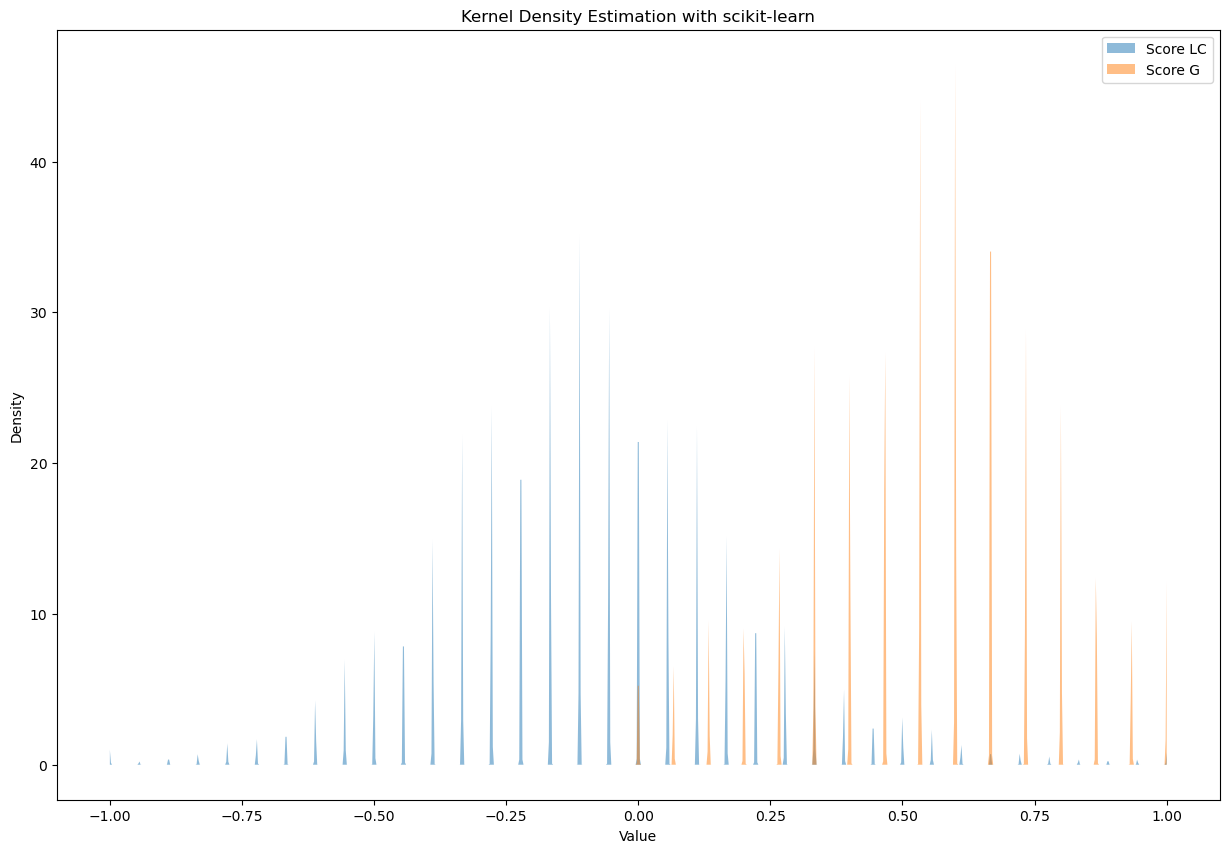

In [8]:
from sklearn.neighbors import KernelDensity

plt.figure(figsize=(15,10))
# Ajustar el modelo KernelDensity para 'score_LC'
X_LC = df_label['score_LC'].values[:, np.newaxis]
kde_LC = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(X_LC)

# Ajustar el modelo KernelDensity para 'score_G'
X_G = df_label['score_G'].values[:, np.newaxis]
kde_G = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(X_G)

# Crear un espacio de puntos donde evaluar las densidades
X_plot = np.linspace(min(df_label['score_LC'].min(), df_label['score_G'].min()),
                     max(df_label['score_LC'].max(), df_label['score_G'].max()), 1000)[:, np.newaxis]

# Evaluar las densidades en esos puntos
log_dens_LC = kde_LC.score_samples(X_plot)
log_dens_G = kde_G.score_samples(X_plot)

# Graficar las densidades
plt.fill_between(X_plot[:, 0], np.exp(log_dens_LC), alpha=0.5, label='Score LC')
plt.fill_between(X_plot[:, 0], np.exp(log_dens_G), alpha=0.5, label='Score G')

# Añadir título y etiquetas
plt.title('Kernel Density Estimation with scikit-learn')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

### Analisis de PMF (Probability Mass Function)

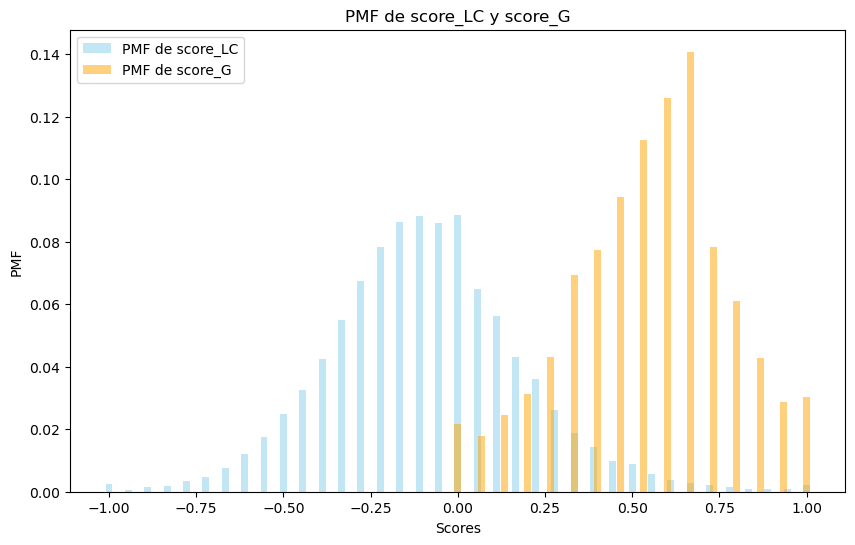

In [9]:
# Calcula las PMF de cada score
values_LC, counts_LC = np.unique(df_label['score_LC'], return_counts=True)
pmf_LC = counts_LC / counts_LC.sum()

values_G, counts_G = np.unique(df_label['score_G'], return_counts=True)
pmf_G = counts_G / counts_G.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_LC, pmf_LC, width=0.02, alpha=0.5, color='skyblue', label='PMF de score_LC')
plt.bar(values_G, pmf_G, width=0.02, alpha=0.5, color='orange', label='PMF de score_G')

# Descripciones de la gráfica
plt.title('PMF de score_LC y score_G')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

In [10]:
# Tablas de frecuencia
frequency_LC = df_label['score_LC'].value_counts().sort_index()
frequency_G = df_label['score_G'].value_counts().sort_index()

In [11]:
# Correlación de Spearman para las columnas 'score_LC' y 'score_G'
spearman_correlation = df_label[['score_LC', 'score_G']].corr(method='spearman')

### Heatmaps de contingencia
Para visualizar la relación entre dos variables discretas, un heatmap de contingencia puede ser útil para mostrar la frecuencia conjunta de pares de valores.

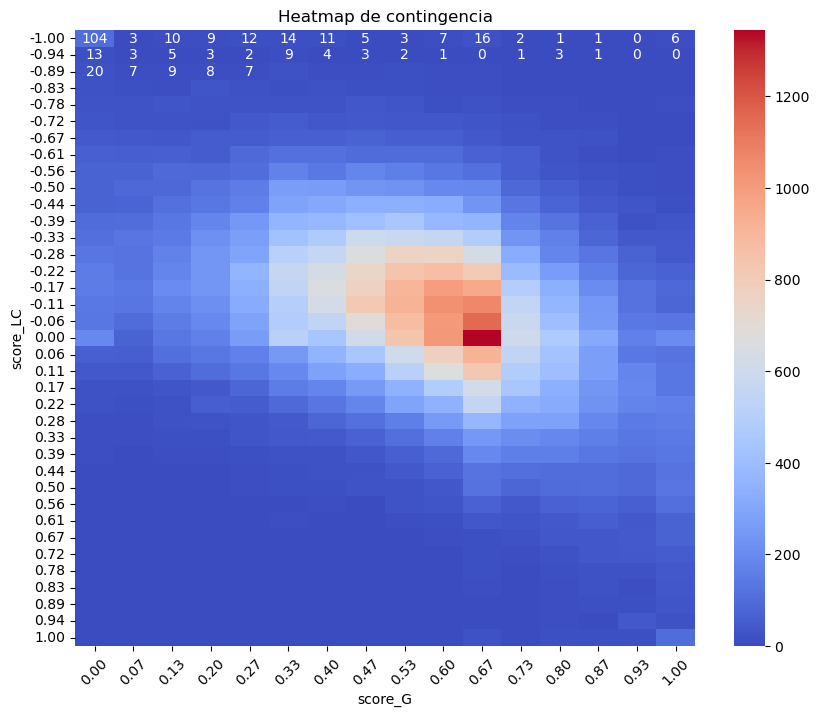

In [12]:
# Heatmap de contingencia
contingency_table = pd.crosstab(df_label['score_LC'], df_label['score_G'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt="d")

#  ticks con dos decimales
plt.xticks([i + 0.5 for i in range(len(contingency_table.columns))],
           ['{:.2f}'.format(val) for val in contingency_table.columns], rotation=45)
plt.yticks([i + 0.5 for i in range(len(contingency_table.index))],
           ['{:.2f}'.format(val) for val in contingency_table.index], rotation=0)

# Título y etiquetas
plt.title('Heatmap de contingencia')
plt.xlabel('score_G')
plt.ylabel('score_LC');

Valores bajos (cercanos a azul): Indican que muy pocos o ningún participante obtuvieron esa combinación particular de puntuaciones en score_LC y score_G. Implica que ciertas combinaciones de cambios conductuales y crecimiento post-traumático son muy raras o no se observan en absoluto, esto podría ser relevante para la interpretación psicológica o sociológica de los datos

chaGPT:

Si el heatmap de contingencia para las variables df_label['score_LC'] (cambios conductuales) y df_label['score_G'] (crecimiento post traumático) muestra valores bajos o ceros, en particular en áreas cercanas al color amarillo, aquí hay algunas interpretaciones psicológicas y sociológicas que podrían ser aplicables:

#### Interpretación Psicológica*:

1. *Poca o Ninguna Mejora Conductual y Crecimiento Post Traumático*: Los valores bajos podrían indicar que hay individuos que no han experimentado cambios significativos en su comportamiento ni han sentido un crecimiento post traumático notable durante la pandemia. Esto podría sugerir una falta de adaptación o una resistencia al cambio, posiblemente debido a un estado de shock o negación frente a la crisis.

1. *Resistencia al Cambio*: Algunos individuos pueden tener una alta resistencia al cambio o pueden haber mantenido rutinas rígidas como mecanismo de afrontamiento, resultando en mínimos cambios conductuales.

1. *Estabilidad en Tiempos de Crisis*: Para algunos, la estabilidad en su comportamiento y la ausencia de crecimiento post traumático pueden reflejar una forma de resiliencia que se manifiesta manteniendo una constancia en sus vidas a pesar de las circunstancias externas.

#### Interpretación Sociológica:

Influencia del Contexto Socioeconómico: Los valores bajos en áreas específicas pueden reflejar cómo el contexto socioeconómico influye en la capacidad de los individuos para experimentar crecimiento o cambios positivos durante tiempos difíciles. Por ejemplo, la falta de recursos puede limitar las oportunidades para mejorar o adaptar comportamientos.

1. *Impacto del Aislamiento Social*: La pandemia ha llevado a muchas personas a experimentar aislamiento social, lo que podría estar relacionado con pocos cambios en la conducta y el crecimiento personal, ya que las interacciones sociales limitadas pueden impedir el crecimiento post traumático.

1. *Desafíos del Confinamiento*: Para aquellos con condiciones de vivienda desafiantes o un entorno de confinamiento restrictivo, es posible que haya poca oportunidad para cambios positivos en el comportamiento o el crecimiento personal.

Es importante señalar que cualquier interpretación de los datos debe hacerse con cautela, considerando la complejidad de las experiencias humanas durante la pandemia. Además, las interpretaciones deben estar respaldadas por un análisis más profundo y, si es posible, por datos cualitativos que puedan proporcionar un contexto más rico para entender las experiencias individuales detrás de los números.

Text(0, 0.5, 'score_LC')

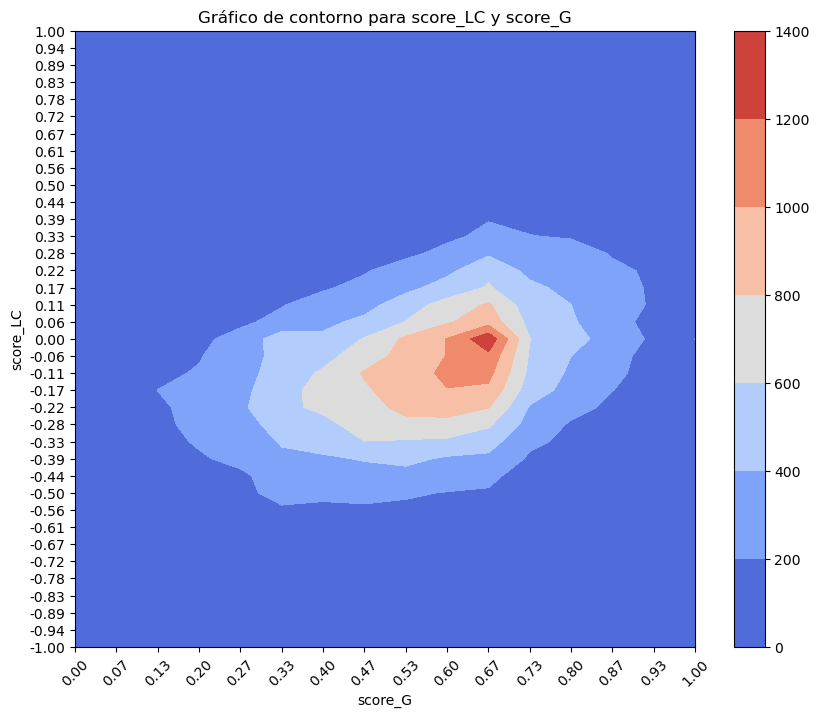

In [13]:
# Preparar los ejes X e Y con los valores únicos de score_G y score_LC
x = np.arange(len(contingency_table.columns))
y = np.arange(len(contingency_table.index))

# Preparar la malla de coordenadas para los ejes X e Y
X, Y = np.meshgrid(x, y)

# Utilizar los valores de la tabla de contingencia como alturas Z
Z = contingency_table.values

# Crear el gráfico de contorno relleno
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, cmap='coolwarm')

# Añadir la barra de colores para interpretar los valores
plt.colorbar(contour)

# Ajustar los ticks para que muestren los valores reales de las variables
plt.xticks(x, ['{:.2f}'.format(val) for val in contingency_table.columns], rotation=45)
plt.yticks(y, ['{:.2f}'.format(val) for val in contingency_table.index])

# Título y etiquetas
plt.title('Gráfico de contorno para score_LC y score_G')
plt.xlabel('score_G')
plt.ylabel('score_LC')

Text(0, 0.5, 'score_LC')

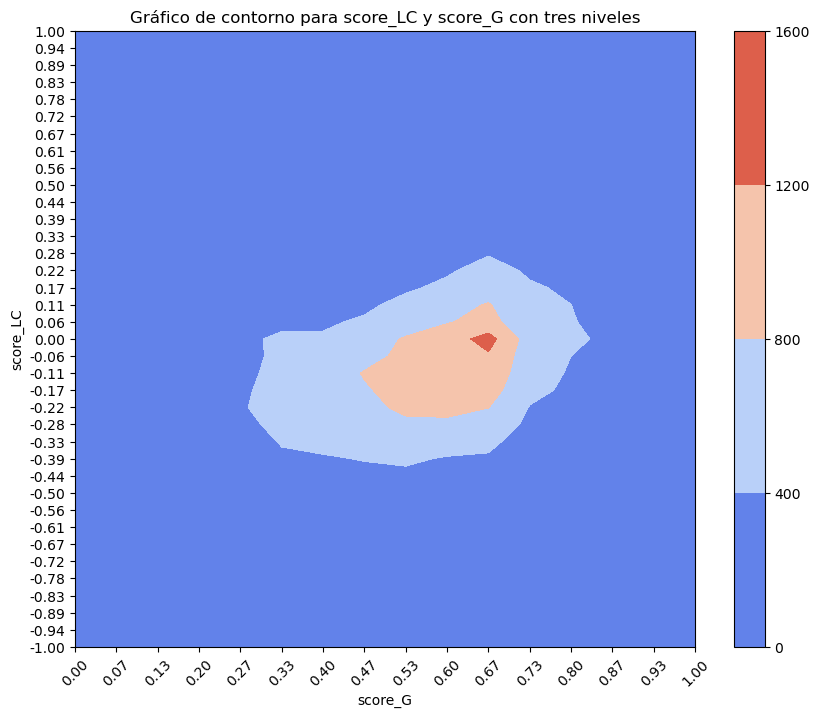

In [14]:
# Preparar los ejes X e Y con los valores únicos de score_G y score_LC
x = np.arange(len(contingency_table.columns))
y = np.arange(len(contingency_table.index))

# Preparar la malla de coordenadas para los ejes X e Y
X, Y = np.meshgrid(x, y)

# Utilizar los valores de la tabla de contingencia como alturas Z
Z = contingency_table.values

# Crear el gráfico de contorno relleno con tres niveles
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=3, cmap='coolwarm')

# Añadir la barra de colores para interpretar los valores
plt.colorbar(contour)

# Ajustar los ticks para que muestren los valores reales de las variables
plt.xticks(x, ['{:.2f}'.format(val) for val in contingency_table.columns], rotation=45)
plt.yticks(y, ['{:.2f}'.format(val) for val in contingency_table.index])

# Título y etiquetas
plt.title('Gráfico de contorno para score_LC y score_G con tres niveles')
plt.xlabel('score_G')
plt.ylabel('score_LC')

(1.0, -1.0)

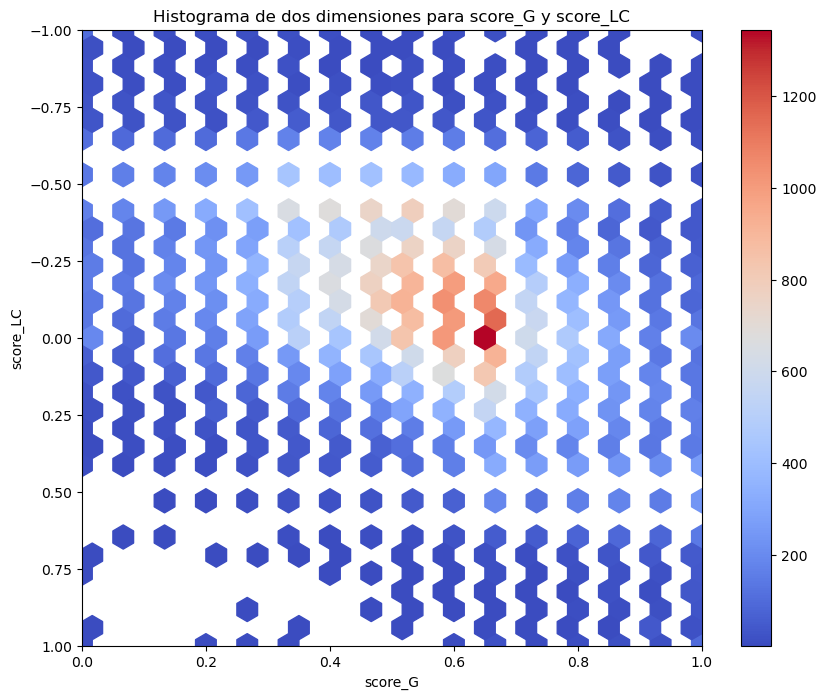

In [15]:
# Crear un histograma de dos dimensiones (también conocido como un hexbin plot o heatmap 2D)
# para las variables df_label['score_LC'] y df_label['score_G'].
plt.figure(figsize=(10, 8))
plt.hexbin(df_label['score_G'], df_label['score_LC'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar()

# Título y etiquetas
plt.title('Histograma de dos dimensiones para score_G y score_LC')
plt.xlabel('score_G')
plt.ylabel('score_LC')

# Ajustar los límites de los ejes para que coincidan con los rangos de las variables
plt.xlim(0, 1)
plt.ylim(1, -1)  # Límites invertidos para el eje Y


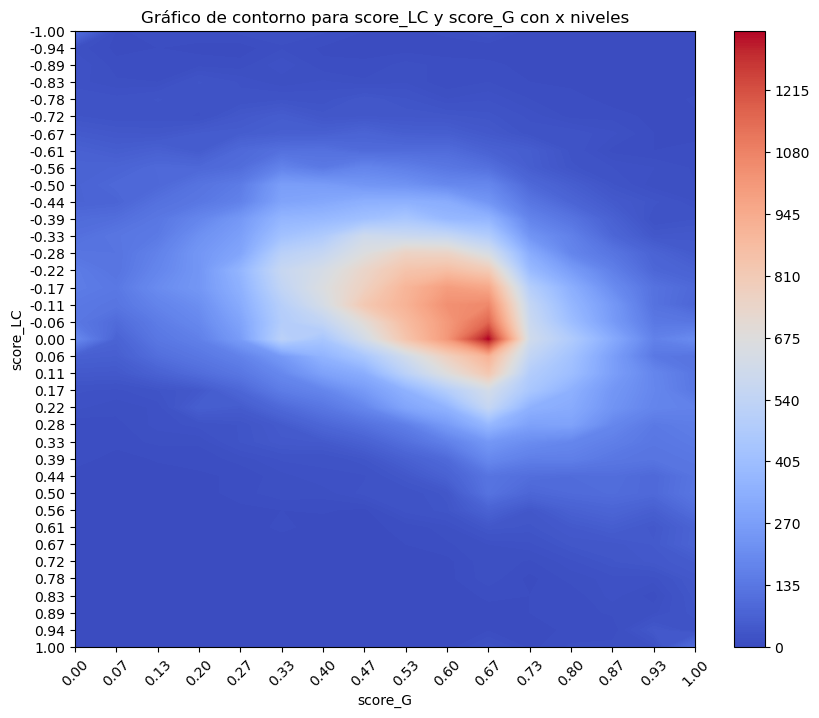

In [16]:
# Preparar los ejes X e Y con los valores únicos de score_G y score_LC
x = np.arange(len(contingency_table.columns))
y = np.arange(len(contingency_table.index))

# Invertir el orden de 'y' para que los valores en el eje Y estén al revés
y = y[::-1]

# Preparar la malla de coordenadas para los ejes X e Y
X, Y = np.meshgrid(x, y)

# Invertir los valores de la tabla de contingencia a lo largo del eje vertical para que coincidan con el eje Y invertido
Z = contingency_table.values
Z = Z[::-1, :]

# Crear el gráfico de contorno relleno
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=600, cmap='coolwarm')

# Añadir la barra de colores para interpretar los valores
plt.colorbar(contour)

# Ajustar los ticks para que muestren los valores reales de las variables
# Las etiquetas del eje Y deben ser invertidas para que el valor más bajo esté en la parte superior
plt.xticks(x, ['{:.2f}'.format(val) for val in contingency_table.columns], rotation=45)
plt.yticks(y, ['{:.2f}'.format(val) for val in contingency_table.index[::-1]])

# Título y etiquetas
plt.title('Gráfico de contorno para score_LC y score_G con x niveles')
plt.xlabel('score_G')
plt.ylabel('score_LC')

# Invertir el eje Y para que la parte superior comience en -1 y termine en 1 en la parte inferior
plt.gca().invert_yaxis()

plt.show()


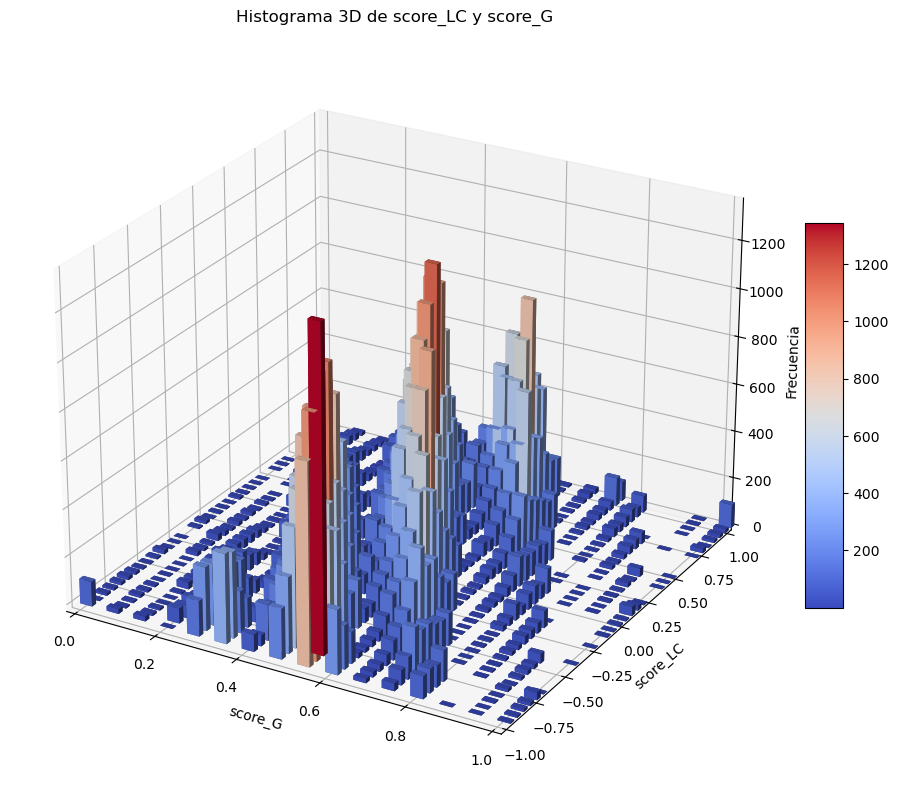

In [17]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
# Crear figura y eje para el gráfico 3D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Coordenadas x, y para cada barra
xpos, ypos = np.meshgrid(contingency_table.columns, contingency_table.index, indexing="ij")

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Altura de las barras
dz = contingency_table.values.flatten()

# Filtrar para eliminar las barras con altura cero
non_zero_mask = dz != 0
xpos = xpos[non_zero_mask]
ypos = ypos[non_zero_mask]
zpos = zpos[non_zero_mask]
dz = dz[non_zero_mask]

# Ancho y profundidad de las barras
dx = dy = 0.03

# Colormap
colors = plt.cm.coolwarm(dz / np.max(dz))

# Crear barras solo si la frecuencia es mayor que cero
if np.any(dz > 0):
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

# Configurar barra de color
norm = Normalize(dz.min(), dz.max())
mappable = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
mappable.set_array(dz)
cbar = fig.colorbar(mappable, shrink=0.5, aspect=10, pad=0.02, ax=ax)

# Título y etiquetas
ax.set_title('Histograma 3D de score_LC y score_G')
ax.set_xlabel('score_G')
ax.set_ylabel('score_LC')
ax.set_zlabel('Frecuencia')

# Ajustar límites de ejes
ax.set_xlim([min(xpos), max(xpos)])
ax.set_ylim([min(ypos), max(ypos)])
ax.set_zlim([0, max(dz)])

ax.view_init(elev=25, azim=-60)

plt.show();

### Correlación de Spearman
El coeficiente de Spearman es una mejor medida (que el coeficiente de correlación de Pearson) ya que no asume una relación lineal y que estén distribuidos normalmente y puede manejar datos ordenados pero no necesariamente continuos.

In [18]:
# Output the Spearman correlation
spearman_correlation

,score_LC,score_G
score_LC,1.000000,0.380553
score_G,0.380553,1.000000


Un valor de 0.347746 indica una correlación positiva moderada entre las dos variables. Significa que a medida que los valores de una variable tienden a aumentar, los valores de la otra variable también tienden a aumentar en un patrón monótono, pero no necesariamente lineal.

In [19]:
dens_diff = np.exp(log_dens_LC) - np.exp(log_dens_G)

# Encontrar los índices donde la diferencia cambia de signo
sign_change_indices = np.where(np.diff(np.sign(dens_diff)))[0]

Dado que los datos presentan una naturaleza discreta, es necesario emplear herramientas analíticas apropiadas. Esta necesidad surge de  la identificación precisa de un punto de equilibrio constituye un componente crítico para las etapas subsiguientes de nuestra propuesta.

Para determinar la variable de interés, sugerimos la siguiente metodología: se realizará la sustracción de las densidades correspondientes a cada característica dentro del conjunto de datos de cada conjunto de preguntas "cambios conductuales" y "crecimiento personal", este analisis fue realiazado previamente mediante un estudio de **PMF** (probability mass function) y **PDF** (probability density function).

De esta manera con los resultados obtenidos previamente se procederá a ralizar una resta entre los valores de densidad de cada herramienta individual, de tal manera que, se almacenara en una lista el indice donde se presente un cambio de signo, lo cual se interpretará como un incremento en la densidad de score_G y una disminución en score_LC.

Los valores almacenados en la lista serán utilizados para el cálculo subsiguiente de un promedio geométrico o aritmético, dependiendo del caso. Este procedimiento pretende determinar el punto de equilibrio basándose en el conjunto de pares valor/densidad que reflejan un cambio significativo.

chatGPT:

Este enfoque para encontrar el punto de equilibrio promediando los valores del eje x donde ocurre un cambio de signo en la diferencia de densidades es válido y puede ser una forma efectiva de manejar la naturaleza discreta de los datos. Este método puede proporcionar un resultado que refleje mejor la transición observada visualmente entre las dos distribuciones, especialmente cuando el cambio no ocurre en un único punto bien definido, sino más bien a lo largo de un intervalo.

Calcular el promedio de los valores del eje x en los índices donde la diferencia de densidad cambia de signo ayuda a suavizar el efecto de la discretización y puede dar una estimación más representativa del "punto de equilibrio" en presencia de variabilidad o ruido en los datos. Este método es particularmente útil cuando esperas que el punto de intersección esté entre dos valores medidos, en lugar de coincidir exactamente con un punto de datos.

### Determinacion del punto de equilibrio

In [20]:
eq_point = X_plot[sign_change_indices].mean()
eq_point

0.4808356743840615

In [21]:
df_label['score_resili'] = df_label['score_LC'] + df_label['score_G']

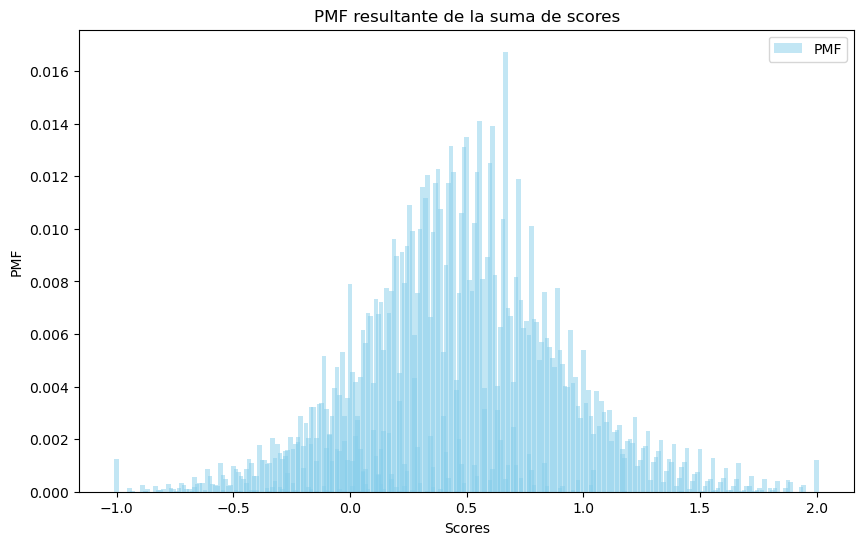

In [22]:
# Calcula las PMF de cada score
values_sum, counts_sum = np.unique(df_label['score_resili'], return_counts=True)
pmf_sum = counts_sum / counts_sum.sum()


# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_sum, pmf_sum, width=0.02, alpha=0.5, color='skyblue', label='PMF')

# Descripciones de la gráfica
plt.title('PMF resultante de la suma de scores')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

### Realizacion del etiquetado

In [23]:
df_label.describe()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_LC,score_G,score_resili
count,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000
mean,-0.463637,-0.462103,0.064753,-0.625036,-0.704637,0.127187,0.034551,-0.173601,0.517626,1.432106,1.539408,1.746605,1.516164,2.020151,-0.093605,0.550296,0.456690
std,1.216550,1.052687,1.058614,0.942489,1.014898,1.071872,0.763808,0.918348,1.040458,0.829423,0.844757,0.880652,0.994423,0.908634,0.278693,0.226348,0.423331
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,-0.277778,0.400000,0.177778
50%,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,-0.111111,0.600000,0.444444
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.055556,0.666667,0.722222
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,2.000000


In [24]:
df_label['Label'] = df_label['score_resili'].apply(lambda x: 0 if x < 0 else (1 if x <= eq_point else 2))
df['score_G'] = df_label['score_G']
df['score_LC'] = df_label['score_LC']
df['score_resili'] = df_label['score_resili']
df['label'] = df_label['Label']
df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Income,Gender,Age,Covid_Self,Stay_Home,Form_Channel,score_G,score_LC,score_resili,label
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,1.0,2.0,38.0,2.0,1.0,2.0,0.933333,0.111111,1.044444,2
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,2.0,3.0,28.0,3.0,2.0,3.0,1.000000,1.000000,2.000000,2
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,42.0,0.0,0.0,2.0,0.733333,0.000000,0.733333,2
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,1.0,1.0,43.0,0.0,0.0,2.0,0.600000,0.555556,1.155556,2
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,39.0,0.0,1.0,10.0,0.800000,0.388889,1.188889,2


In [25]:
df['label'].value_counts()

label
2    38568
1    33641
0    10567
Name: count, dtype: int64

### Determinacion de la congruencia del etiquetado respecto al valor de los scores

In [26]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [0,1,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10).index.tolist()
    selected_indices.extend(sampled_indices)

# Mostrar los índices de las observaciones seleccionadas
print(selected_indices)

[32015, 27192, 48654, 62221, 65546, 37224, 2917, 33893, 20911, 24699, 82457, 15830, 58344, 13603, 66307, 16313, 35185, 31538, 38828, 79305, 13950, 74747, 24160, 35370, 71424, 20706, 59891, 2386, 50122, 61249]


In [27]:
selected_data = df_label.loc[selected_indices]

# Mostrar el nuevo DataFrame
selected_data.iloc[:30, 0:]

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_LC,score_G,score_resili,Label
32015,-2.0,-2.0,-2.0,-1.0,-2.0,1.0,-2.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.611111,0.000000,-0.611111,0
27192,-1.0,-2.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.388889,0.066667,-0.322222,0
48654,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,2.0,1.0,0.0,0.0,1.0,-0.277778,0.266667,-0.011111,0
62221,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-0.555556,0.266667,-0.288889,0
65546,-2.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.222222,0.200000,-0.022222,0
37224,-1.0,-2.0,0.0,-2.0,-1.0,-2.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,2.0,-0.555556,0.266667,-0.288889,0
2917,-2.0,-1.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,-0.500000,0.200000,-0.300000,0
33893,-2.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,-0.333333,0.133333,-0.200000,0
20911,0.0,-2.0,0.0,-2.0,-2.0,0.0,-1.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.000000,-0.333333,0
24699,-2.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.000000,-0.333333,0


### Analisis de las distribuciones de probabilidad

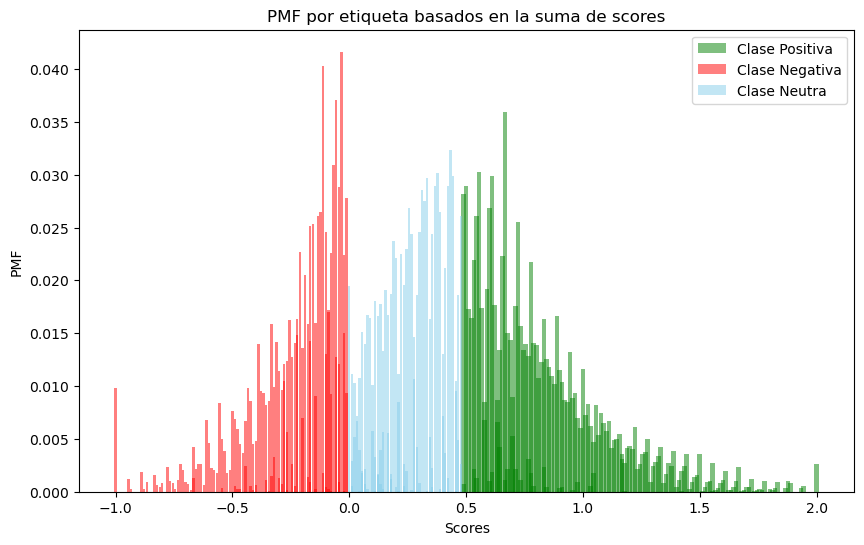

In [28]:
columns =  ['score_resili',]
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]
labels_zero_one = df_label.loc[df_label['Label'] == 1, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()

values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()

values_neu, counts_neu = np.unique( labels_zero_one, return_counts=True)
pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.01, alpha=0.5, color='red', label='Clase Negativa')
plt.bar(values_neu, pmf_neu, width=0.01, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en la suma de scores')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

Para el presente estudio se propone separación de clases mediante establecimiento de tres etiquetas:

1. **Clase positiva**: Toda aquella cuyo valor de score fue mayor al punto de equilibrio. La funcion del punto de equilibrio es de alguna manera resumir y generalizar la informacion proveniente de los instrumentos "cambios conductuales" y "crecimiento personal", de esta manera podemos separar de forma eficiente con un unico valor a todos aquellos individuos cuya autopercepcion ante un evento traumatico fue positiva.
2. **Clase neutra**: Pese a no ser una de clases principales u objetos de interes es necesario considerar en esta clase a todas las observaciones no asociadas a un crecimiento ni positivo ni negativo. Si no que, la informacion o conocimiento del individuo sobre si mismo no fue suficiente para dar un resultado claro dentro de las dos clases de interes, si no uno ambiguo.
3. **Clase negativa**: Aqui se encuentran todas aquellas observaciones relacionadas a un score menor que cero, en otras palabras que su score de crecimiento fue menor al de cambios conductuales. Esta calse estan asociados los individuos los cuales tuvieron un crecimiento pos-traumatico negativo.

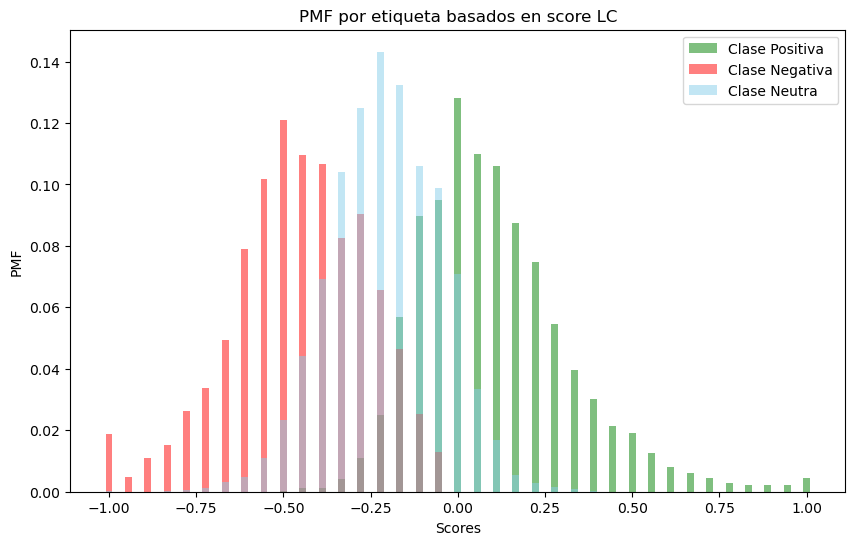

In [29]:
columns =  ['score_LC',]
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]
labels_neu = df_label.loc[df_label['Label'] == 1, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()
values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()
values_neu, counts_neu = np.unique( labels_neu, return_counts=True)
pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.02, alpha=0.5, color='red', label='Clase Negativa')
plt.bar(values_neu, pmf_neu, width=0.02, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en score LC')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

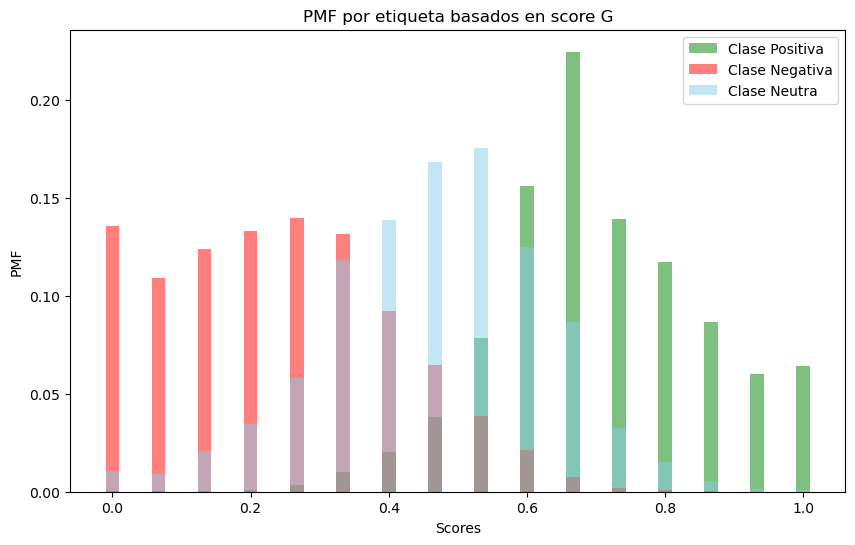

In [30]:
columns =  ['score_G',]
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]
labels_neu = df_label.loc[df_label['Label'] == 1, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()
values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()
values_neu, counts_neu = np.unique( labels_neu, return_counts=True)
pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.02, alpha=0.5, color='red', label='Clase Negativa')
plt.bar(values_neu, pmf_neu, width=0.02, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en score G')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend()

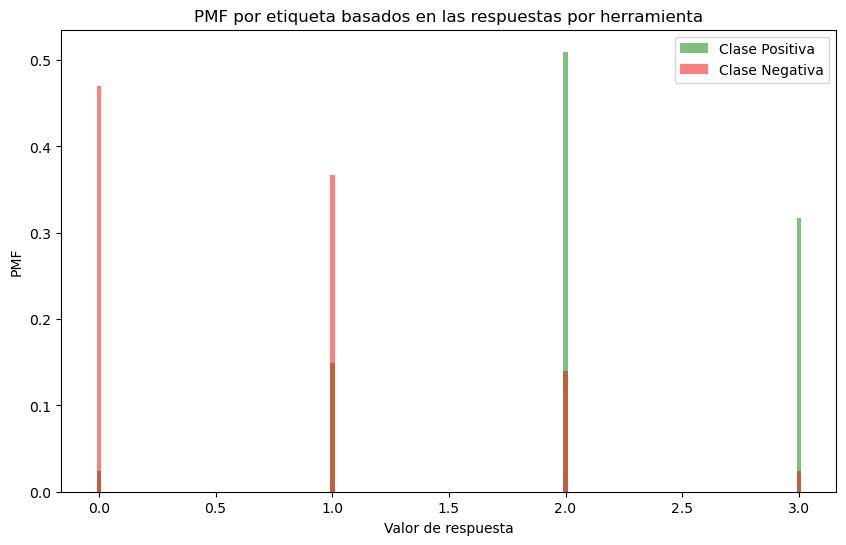

In [31]:
columns =  ['Growth_1', 'Growth_2', 'Growth_3', 'Growth_4',
       'Growth_5']
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()
values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()
# values_neu, counts_neu = np.unique( df_label[df_label['Label'] == 0], return_counts=True)
# pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.02, alpha=0.5, color='red', label='Clase Negativa')
# plt.bar(values_neu, pmf_neu, width=0.02, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en las respuestas por herramienta')
plt.xlabel('Valor de respuesta')
plt.ylabel('PMF')
plt.legend();

### Separabilidad de las features por etiqueta

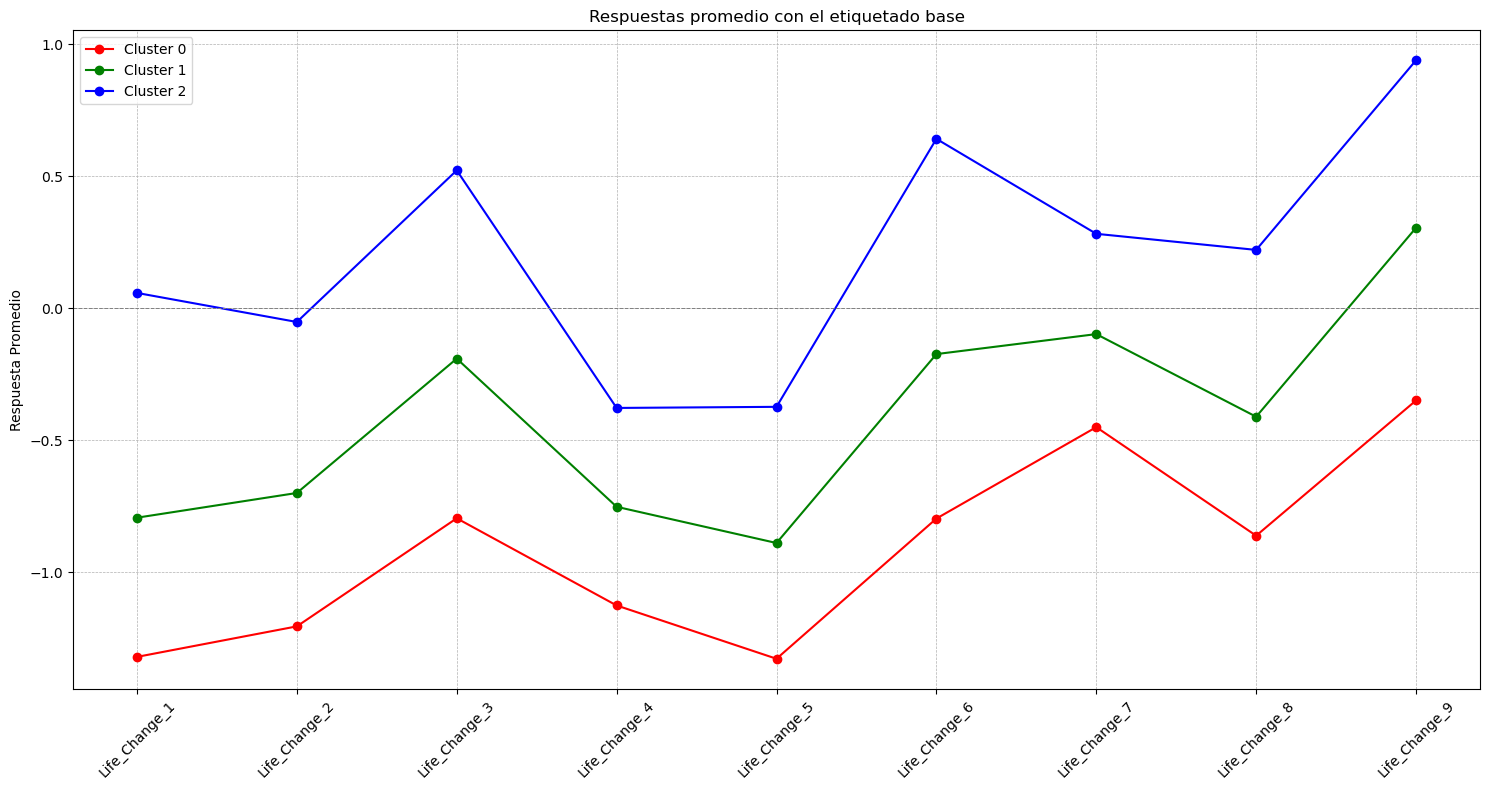

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9
label,,,,,,,,,
0,-1.320526,-1.204883,-0.795401,-1.125674,-1.327624,-0.796442,-0.450080,-0.861361,-0.348822
1,-0.793110,-0.699444,-0.190393,-0.751821,-0.889064,-0.173211,-0.097500,-0.410541,0.305431
2,0.058520,-0.051571,0.522972,-0.377282,-0.373081,0.642268,0.282514,0.221505,0.940106


In [32]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df.groupby('label')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4',
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8',
                                         'Life_Change_9']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio con el etiquetado base')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

### Obtencion de la media aritmetica de cada herramienta

In [33]:
df_new = pd.DataFrame(df.iloc[:,14:17].mean(axis=1))
df_new = df_new.rename(columns={0:'adapt'})
df_new['prevent_exp'] = df.iloc[:,17:25].mean(axis=1)
df_new['prevent_reason'] = df.iloc[:,25:29].mean(axis=1)
df_new['follow_norms'] = df.iloc[:,29:30]
df_new['leaving_home'] = df.iloc[:,30:32].mean(axis=1)
df_new['people'] = df.iloc[:,32:33]
df_new['rooms'] = df.iloc[:,33:34]
df_new['amenit'] = df.iloc[:,34:38].mean(axis=1)
df_new['respons'] = df.iloc[:,38:41].mean(axis=1)
df_new['prevent_selfeffic'] = df.iloc[:,41:49].mean(axis=1)
df_new['prevent_outcome'] = df.iloc[:,49:57].mean(axis=1)
df_new['prevent_socialnorm'] = df.iloc[:,57:65].mean(axis=1)
df_new['adherence_factor'] = df.iloc[:,65:70].mean(axis=1)
df_new['trust'] = df.iloc[:,70:75].mean(axis=1)
df_new['info'] = df.iloc[:,75:76]
df_new['prevent_intention'] = df.iloc[:,76:84].mean(axis=1)
df_new['vulnerability_self'] = df.iloc[:,84:85]
df_new['vulnerability_others'] = df.iloc[:,85:86]
df_new['gravity_self'] = df.iloc[:,86:87]
df_new['gravity_others'] = df.iloc[:,87:88]
df_new['threat'] = df.iloc[:,88:92].mean(axis=1)
df_new['depress'] = df.iloc[:,92:94].mean(axis=1)
df_new['anxiety'] = df.iloc[:,94:96].mean(axis=1)
df_new['loneliness'] = df.iloc[:,96:97]
df_new['somatic'] = df.iloc[:,97:102].mean(axis=1)
df_new['resili'] = df.iloc[:,102:104].mean(axis=1)
df_new['perso_x'] = df.iloc[:,104:105]
df_new['perso_c'] = df.iloc[:,105:106]
df_new['perso_a'] = df.iloc[:,106:107]
df_new['perso_e'] = df.iloc[:,107:108]
df_new['perso_o'] = df.iloc[:,108:109]
df_new['perc_comp'] = df.iloc[:,109:110]
df_new['cluster'] = df.iloc[:,110:115].mean(axis=1)
df_new['country'] = df.iloc[:,115:116]
df_new['education'] = df.iloc[:,116:117]
df_new['income'] = df.iloc[:,117:118]
df_new['gender'] = df.iloc[:,118:119]
df_new['age'] = df.iloc[:,119:120]
df_new['covid_self'] = df.iloc[:,120:121]
df_new['stay_home'] = df.iloc[:,121:122]
df_new['from_channel'] = df.iloc[:,122:123]
df_new['score_G'] = df.iloc[:,123:124]
df_new['score_LC'] = df.iloc[:,124:125]
df_new['score_resili'] = df.iloc[:,125:126]
df_new['label'] = df.iloc[:,126:127]
df_raw = df
df = df_new
df

,adapt,prevent_exp,prevent_reason,follow_norms,leaving_home,people,rooms,amenit,respons,prevent_selfeffic,...,income,gender,age,covid_self,stay_home,from_channel,score_G,score_LC,score_resili,label
0,2.000000,2.000,1.50,3.0,1.0,2.0,3.0,0.50,0.333333,3.000,...,1.0,2.0,38.0,2.0,1.0,2.0,0.933333,0.111111,1.044444,2
1,0.000000,0.875,1.00,1.0,-1.0,7.0,1.0,0.25,0.333333,2.000,...,2.0,3.0,28.0,3.0,2.0,3.0,1.000000,1.000000,2.000000,2
2,2.666667,2.625,3.00,3.0,1.5,2.0,3.0,0.75,0.666667,3.000,...,1.0,1.0,42.0,0.0,0.0,2.0,0.733333,0.000000,0.733333,2
3,2.333333,2.375,2.25,3.0,2.0,3.0,3.0,0.25,0.333333,1.875,...,1.0,1.0,43.0,0.0,0.0,2.0,0.600000,0.555556,1.155556,2
4,1.333333,2.500,3.00,3.0,1.0,1.0,2.0,0.25,0.333333,2.875,...,1.0,1.0,39.0,0.0,1.0,10.0,0.800000,0.388889,1.188889,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82771,1.666667,1.125,1.00,3.0,0.5,4.0,4.0,1.00,0.333333,1.750,...,1.0,2.0,53.0,1.0,0.0,5.0,0.133333,-0.055556,0.077778,1
82772,1.333333,2.250,1.00,3.0,-0.5,2.0,6.0,0.75,0.333333,2.750,...,1.0,2.0,38.0,2.0,1.0,2.0,0.133333,-0.111111,0.022222,1
82773,2.333333,2.125,1.75,3.0,2.0,0.0,3.0,0.25,0.333333,3.000,...,1.0,2.0,36.0,1.0,1.0,5.0,0.600000,0.444444,1.044444,2
82774,-1.333333,0.000,0.00,0.0,-1.0,0.0,0.0,0.25,0.333333,0.000,...,1.0,2.0,21.0,1.0,-2.0,3.0,0.000000,-0.500000,-0.500000,0


,adapt,prevent_exp,prevent_reason,follow_norms,leaving_home,people,rooms,amenit,respons,prevent_selfeffic,...,income,gender,age,covid_self,stay_home,from_channel,score_G,score_LC,score_resili,label
count,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,...,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000,82776.000000
mean,1.089027,2.015604,2.046810,2.458092,0.458563,3.211450,3.396081,0.497324,0.215356,2.238202,...,0.840908,1.651360,35.295086,0.589289,0.788284,6.850971,0.550296,-0.093605,0.456690,1.338274
std,0.803064,0.540266,0.621869,0.615796,0.774128,2.158749,1.412547,0.273418,0.223640,0.575159,...,0.557900,0.485359,13.871530,0.722676,1.115589,3.678219,0.226348,0.278693,0.423331,0.692218
min,-1.333333,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,16.000000,0.000000,-2.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,0.666667,1.750000,1.500000,2.000000,0.000000,2.000000,3.000000,0.250000,0.000000,1.875000,...,1.000000,1.000000,24.000000,0.000000,0.000000,3.000000,0.400000,-0.277778,0.177778,1.000000
50%,1.333333,2.000000,2.000000,3.000000,0.500000,3.000000,3.000000,0.500000,0.333333,2.250000,...,1.000000,2.000000,32.000000,0.000000,1.000000,10.000000,0.600000,-0.111111,0.444444,1.000000
75%,1.666667,2.375000,2.500000,3.000000,1.000000,4.000000,4.000000,0.750000,0.333333,2.750000,...,1.000000,2.000000,45.000000,1.000000,2.000000,10.000000,0.666667,0.055556,0.722222,2.000000
max,2.666667,3.000000,3.000000,3.000000,3.000000,10.000000,6.000000,1.000000,1.000000,3.000000,...,2.000000,3.000000,99.000000,3.000000,2.000000,10.000000,1.000000,1.000000,2.000000,2.000000


### Analisis de colinealidad

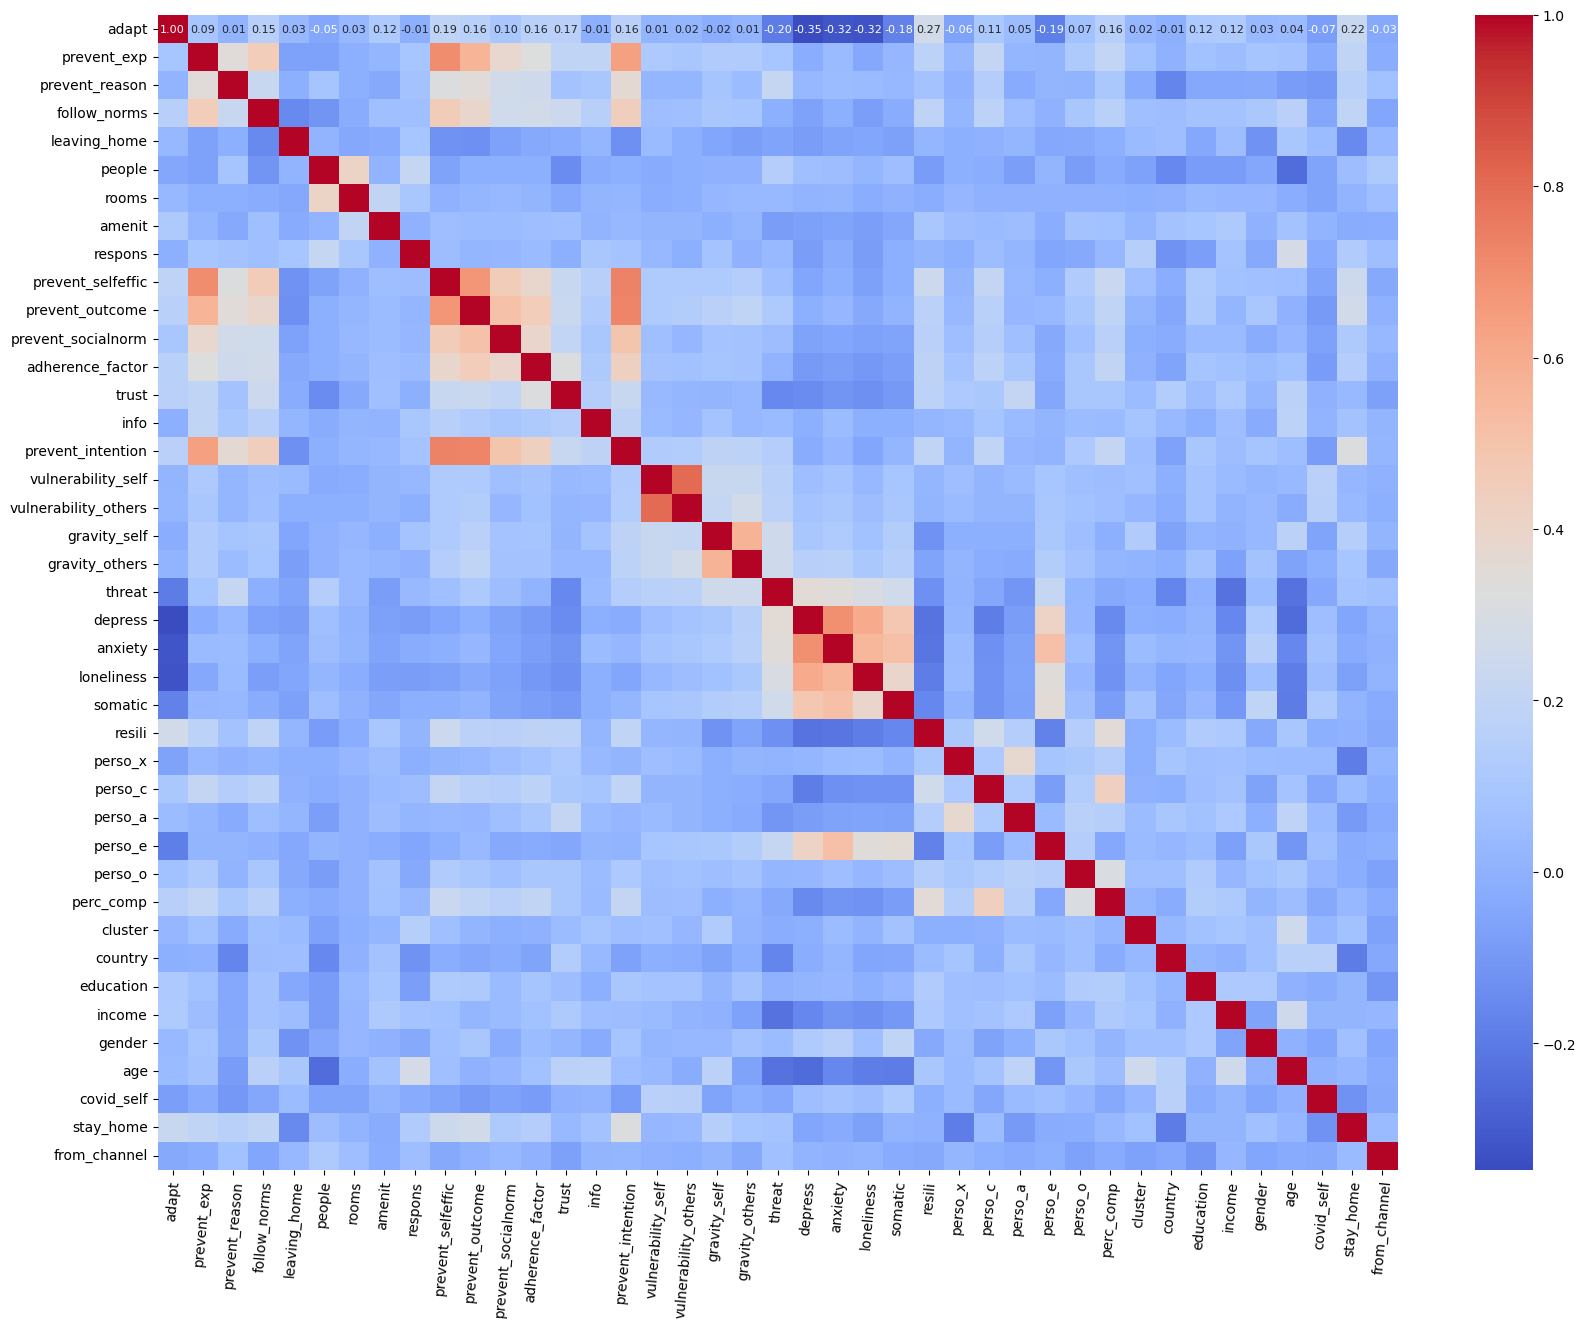

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.drop(['score_G','score_LC','score_resili','label'], axis=1).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size':8})
plt.xticks(rotation=85)
plt.show()


In [36]:
strong_pairs = corr_matrix.abs().stack().reset_index()
strong_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar aquellos pares con una correlación >= 0.7 y que no sean la misma variable
strong_pairs = strong_pairs[(strong_pairs['Correlación'] >= 0.7) & (strong_pairs['Variable 1'] != strong_pairs['Variable 2'])]

# Eliminar duplicados, ya que la matriz es simétrica
strong_pairs = strong_pairs.drop_duplicates(subset=['Correlación'])

print(strong_pairs)

             Variable 1            Variable 2  Correlación
50          prevent_exp     prevent_selfeffic     0.703060
384   prevent_selfeffic     prevent_intention     0.732153
425     prevent_outcome     prevent_intention     0.729466
673  vulnerability_self  vulnerability_others     0.802061


Es necesaria la determinacion de aquellas features las cuales tengan mayor correlacion. En este caso vemos que las columnas "prevent_selffic" y "prevent_intention" se encuentran repetidas, por ende se tomara la decision de extraerlas del conjunto de datos original.

Las herramientas de "vulnerability" presentan un alto nivel de correlacion. El criterio para determinar cual feature debe ser extraida se basa en la busqueda de aquella que presente una mayor correlacion con las extraidas previamente. Sin embargo, el criterio establecido no se cumple para este caso debido a que ambas presentan el mismo nivel de correlacion.

Para decididr cual de las dos herramientas debe ser extraida es importante conocer el contexto y objetivo de cada una de ellas:
* vulnerability_self: Describe a probabilidad de que el individuo se contagie en el futuro de coronavirus.
* vulnerability_others: Describe la probabilidad de que, las personas cercanas al entorno del individuo se contagien de coronavirus.

Debio a que la obtencion de la variable objetivo se baso en la autopercepcion del individuo (herramientas "life_change" y "growth"), suena coherente conservar aquellas que hablen sobre la autoevaluacion y percepcion del ambiente y las posibilidades propias de cada individuo.

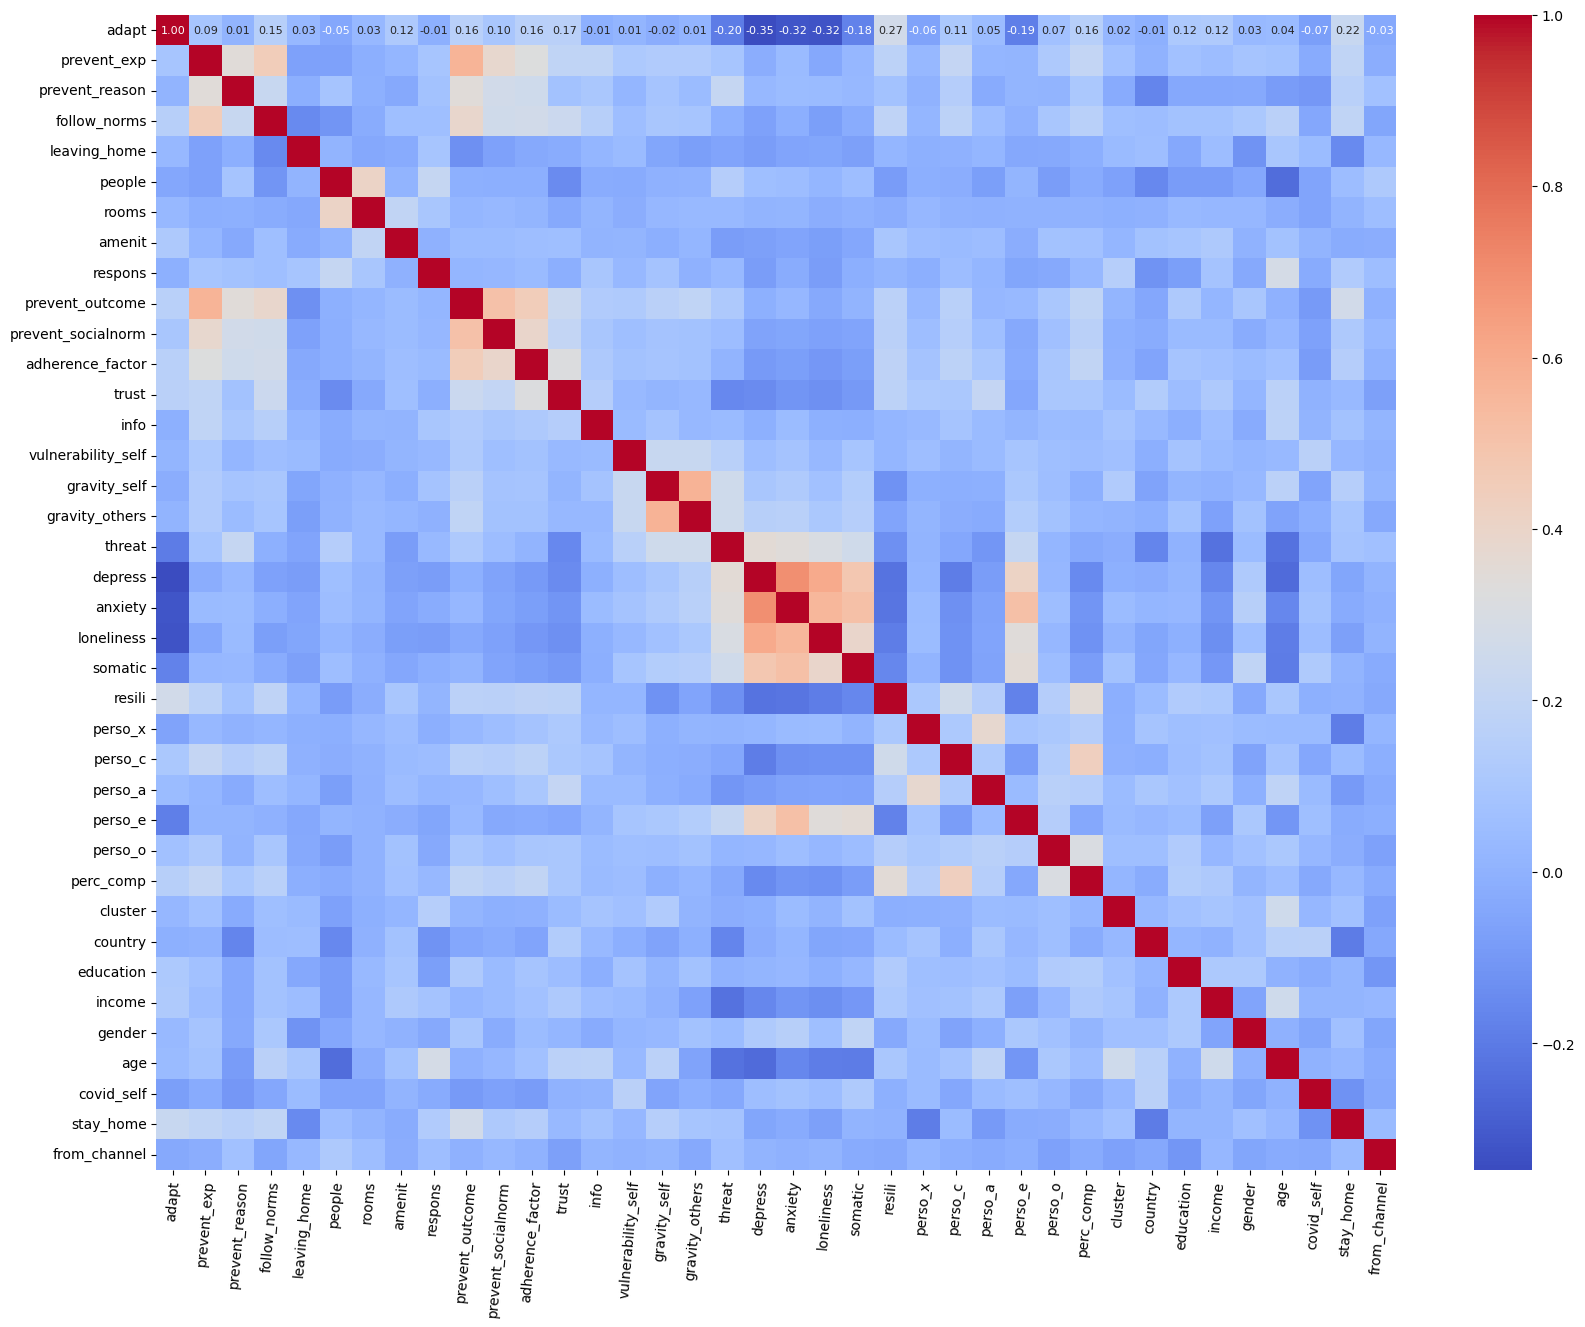

In [37]:
df.drop(['prevent_selfeffic','prevent_intention','vulnerability_others'], axis=1, inplace=True)
# Calcular la matriz de correlación
corr_matrix =  df.drop(['score_G','score_LC','score_resili','label'], axis=1).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size':8})
plt.xticks(rotation=85)
plt.show()

In [38]:
strong_pairs = corr_matrix.abs().stack().reset_index()
strong_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar aquellos pares con una correlación >= 0.7 y que no sean la misma variable
strong_pairs = strong_pairs[(strong_pairs['Correlación'] >= 0.7) & (strong_pairs['Variable 1'] != strong_pairs['Variable 2'])]

# Eliminar duplicados, ya que la matriz es simétrica
strong_pairs = strong_pairs.drop_duplicates(subset=['Correlación'])

print(strong_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlación]
Index: []


Con esto confirmamos que ya no hay valores de correlacion superiores a 0.7

### Separacion datos de entrenamiento y prueba

#### Dataset completo con las 3 etiquetas

In [39]:
selected_data

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,score_LC,score_G,score_resili,Label
32015,-2.0,-2.0,-2.0,-1.0,-2.0,1.0,-2.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.611111,0.000000,-0.611111,0
27192,-1.0,-2.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.388889,0.066667,-0.322222,0
48654,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,2.0,1.0,0.0,0.0,1.0,-0.277778,0.266667,-0.011111,0
62221,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-0.555556,0.266667,-0.288889,0
65546,-2.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.222222,0.200000,-0.022222,0
37224,-1.0,-2.0,0.0,-2.0,-1.0,-2.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,2.0,-0.555556,0.266667,-0.288889,0
2917,-2.0,-1.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,-0.500000,0.200000,-0.300000,0
33893,-2.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,-0.333333,0.133333,-0.200000,0
20911,0.0,-2.0,0.0,-2.0,-2.0,0.0,-1.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.000000,-0.333333,0
24699,-2.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.000000,-0.333333,0


In [40]:
# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [0,1,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data = df.loc[selected_indices]
# Mostrar el nuevo DataFrame
selected_data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(selected_data.drop(['score_G','score_LC','score_resili','label'],axis=1),selected_data[['score_G', 'score_LC']],test_size=0.1,random_state=42)

# Normalizacion
from sklearn import preprocessing as prp
transform = prp.MinMaxScaler()
x_train_norm = pd.DataFrame(transform.fit_transform(x_train))
x_test_norm = pd.DataFrame(transform.fit_transform(x_test))
x_train_norm.columns, x_test_norm.columns = x_train.columns, x_test.columns
x_train_norm.shape, x_test_norm.shape

((27000, 38), (3000, 38))

### Objetivo 1

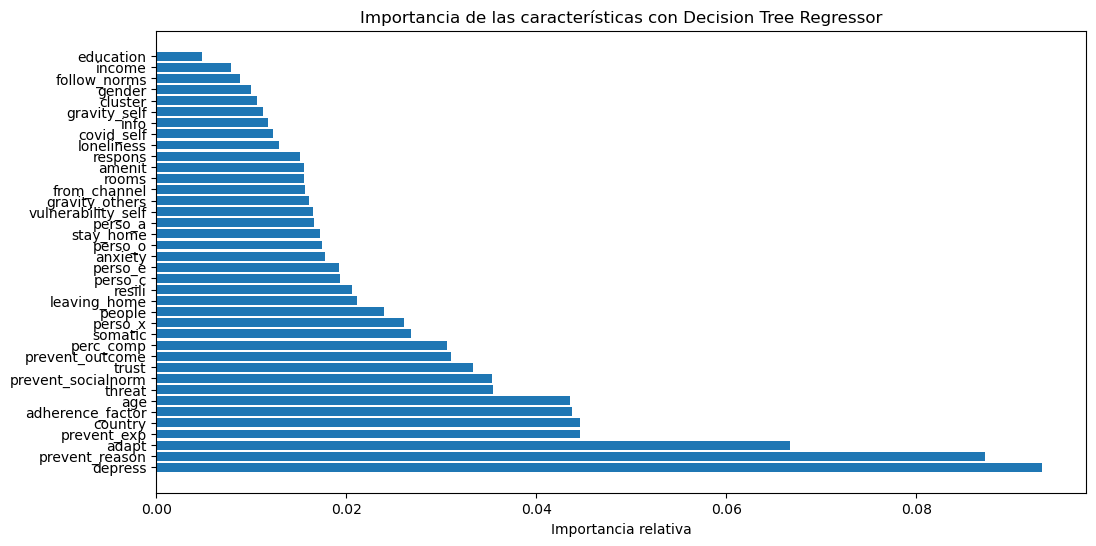

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Inicializar el árbol de decisión para regresión
tree_reg = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
tree_reg.fit(x_train_norm, y_train['score_G'])

# Obtener la importancia de las características
feature_importances = tree_reg.feature_importances_

# Visualizar la importancia de las características
import matplotlib.pyplot as plt
import numpy as np

features = x_train_norm.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las características con Decision Tree Regressor")
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from time import perf_counter
x_train_Ob1 = x_train_norm[['adapt','depress','anxiety', 'adherence_factor']]
x_test_Ob1 = x_test_norm[['adapt','depress','anxiety', 'adherence_factor']]


In [ ]:
import optuna
# Define el modelo dentro de una función que tomará los hiperparámetros como argumentos
def create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6,
                 init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, regularizer_type):

    if regularizer_type == "l1":
        regularizer = keras.regularizers.l1(0.01)
    elif regularizer_type == "l2":
        regularizer = keras.regularizers.l2(0.01)
    else:
        regularizer = None


    model = keras.Sequential([
        keras.layers.Dense(1024, input_shape=(x_train_norm.shape[1],), activation=activation_1,
                           kernel_initializer=init_mode_1, kernel_regularizer=regularizer_type),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation=activation_2, kernel_initializer=init_mode_2),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation=activation_3, kernel_initializer=init_mode_3),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation=activation_4, kernel_initializer=init_mode_4),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation=activation_5, kernel_initializer=init_mode_5),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation=activation_6, kernel_initializer=init_mode_6),
        keras.layers.Dense(1)
    ])
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Función objetivo para Optuna
def objective(trial):

    regularizer_type = trial.suggest_categorical('regularizer_type', [None, "l1", "l2"])

    activations_list = ["elu","exponential","hard_sigmoid","linear", "relu","selu","sigmoid","softmax","softplus",
                                                                                         "softsign","swish","tanh"]
    activation_1 = trial.suggest_categorical('activation_1', activations_list)
    activation_2 = trial.suggest_categorical('activation_2', activations_list)
    activation_3 = trial.suggest_categorical('activation_3', activations_list)
    activation_4 = trial.suggest_categorical('activation_4', activations_list)
    activation_5 = trial.suggest_categorical('activation_5', activations_list)
    activation_6 = trial.suggest_categorical('activation_6', activations_list)

    init_list = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    init_mode_1 = trial.suggest_categorical('init_mode_1', init_list)
    init_mode_2 = trial.suggest_categorical('init_mode_2', init_list)
    init_mode_3 = trial.suggest_categorical('init_mode_3', init_list)
    init_mode_4 = trial.suggest_categorical('init_mode_4', init_list)
    init_mode_5 = trial.suggest_categorical('init_mode_5', init_list)
    init_mode_6 = trial.suggest_categorical('init_mode_6', init_list)

    model = create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6,
                 init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, regularizer_type)
    EarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
    history = model.fit(x_train_norm, y_train['score_G'], epochs=100, validation_data=(x_test_norm, y_test['score_G']), verbose=0, callbacks=EarlyStop)

    # Usa la pérdida de validación como métrica para optimizar
    val_loss = history.history['val_loss'][-1]
    return val_loss
start=perf_counter()
# Iniciar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:", study.best_params)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


[I 2024-02-23 10:47:11,736] A new study created in memory with name: no-name-f83c0091-2899-4db4-b5fb-a614602d55a9
[I 2024-02-23 10:48:57,035] Trial 0 finished with value: 0.04202146828174591 and parameters: {'regularizer_type': None, 'activation_1': 'softplus', 'activation_2': 'sigmoid', 'activation_3': 'linear', 'activation_4': 'exponential', 'activation_5': 'selu', 'activation_6': 'relu', 'init_mode_1': 'zero', 'init_mode_2': 'he_normal', 'init_mode_3': 'he_uniform', 'init_mode_4': 'uniform', 'init_mode_5': 'uniform', 'init_mode_6': 'uniform'}. Best is trial 0 with value: 0.04202146828174591.
[I 2024-02-23 10:49:37,901] Trial 1 finished with value: 0.06065588444471359 and parameters: {'regularizer_type': None, 'activation_1': 'tanh', 'activation_2': 'relu', 'activation_3': 'softmax', 'activation_4': 'softmax', 'activation_5': 'selu', 'activation_6': 'softmax', 'init_mode_1': 'glorot_uniform', 'init_mode_2': 'zero', 'init_mode_3': 'normal', 'init_mode_4': 'he_uniform', 'init_mode_5': 

Mejores hiperparámetros: {'regularizer_type': None, 'activation_1': 'relu', 'activation_2': 'sigmoid', 'activation_3': 'relu', 'activation_4': 'sigmoid', 'activation_5': 'softsign', 'activation_6': 'sigmoid', 'init_mode_1': 'he_uniform', 'init_mode_2': 'uniform', 'init_mode_3': 'lecun_uniform', 'init_mode_4': 'he_normal', 'init_mode_5': 'normal', 'init_mode_6': 'zero'}
Elapsed time: 125.79 min.


In [ ]:
dicc = study.best_params
dicc

{'regularizer_type': None,
 'activation_1': 'relu',
 'activation_2': 'sigmoid',
 'activation_3': 'relu',
 'activation_4': 'sigmoid',
 'activation_5': 'softsign',
 'activation_6': 'sigmoid',
 'init_mode_1': 'he_uniform',
 'init_mode_2': 'uniform',
 'init_mode_3': 'lecun_uniform',
 'init_mode_4': 'he_normal',
 'init_mode_5': 'normal',
 'init_mode_6': 'zero'}

In [91]:
dicc = {'regularizer_type': None,
 'activation_1': 'relu',
 'activation_2': 'sigmoid',
 'activation_3': 'relu',
 'activation_4': 'sigmoid',
 'activation_5': 'softsign',
 'activation_6': 'sigmoid',
 'init_mode_1': 'he_uniform',
 'init_mode_2': 'uniform',
 'init_mode_3': 'lecun_uniform',
 'init_mode_4': 'he_normal',
 'init_mode_5': 'normal',
 'init_mode_6': 'zero'}

In [92]:
if dicc['regularizer_type'] == 'None':
    dicc['regularizer_type'] = None

model_1 = tf.keras.Sequential([
    keras.layers.Dense(1024, input_shape=(x_train_norm.shape[1],), activation = dicc['activation_1'], kernel_initializer=dicc['init_mode_1'], kernel_regularizer=dicc['regularizer_type']),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=dicc['activation_2'], kernel_initializer=dicc['init_mode_2']),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation=dicc['activation_3'], kernel_initializer=dicc['init_mode_3']),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation=dicc['activation_4'], kernel_initializer=dicc['init_mode_4']),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=dicc['activation_5'], kernel_initializer=dicc['init_mode_5']),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation=dicc['activation_6'], kernel_initializer=dicc['init_mode_6']),
    keras.layers.Dense(1)
])

model_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

EarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 250, mode = 'min', restore_best_weights = True)

history_1 = model_1.fit(x_train_norm, y_train['score_G'], epochs = 1000, validation_data=(x_test_norm, y_test['score_G']), callbacks=EarlyStop)

model_1.evaluate(x_test_norm, y_test['score_G'])

NameError: name 'tf' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
pred = model_1.predict(x_test_norm)
rmse = np.sqrt(mean_squared_error(y_test['score_G'], pred))
target_range = np.max(y_test['score_G']) - np.min(y_test['score_G'])
percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy

94/94 [==============================] - 0s 1ms/step


79.79542484429568

['adapt','depress','anxiety', 'adherence_factor']

In [ ]:
import optuna
import tensorflow as tf
from tensorflow import keras
from time import perf_counter
x_train_Ob1 = x_train_norm[['adapt','perc_comp','depress','prevent_reason','anxiety', 'adherence_factor','prevent_outcome']]
x_test_Ob1 = x_test_norm[['adapt','perc_comp','depress','prevent_reason','anxiety', 'adherence_factor','prevent_outcome']]

def create_model(activation_1, activation_2, activation_3, init_mode_1, init_mode_2, init_mode_3, regularizer_type):

    if regularizer_type == "l1":
        regularizer = keras.regularizers.l1(0.01)
    elif regularizer_type == "l2":
        regularizer = keras.regularizers.l2(0.01)
    else:
        regularizer = None


    model = keras.Sequential([
        keras.layers.Dense(950, input_shape=(7,), activation=activation_1,
                           kernel_initializer=init_mode_1, kernel_regularizer=regularizer_type),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(950, activation=activation_2, kernel_initializer=init_mode_2),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(950, activation=activation_3, kernel_initializer=init_mode_3),
        keras.layers.Dense(1)
    ])
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Función objetivo para Optuna
def objective(trial):

    regularizer_type = trial.suggest_categorical('regularizer_type', [None, "l1", "l2"])

    activations_list = ["elu","exponential","hard_sigmoid","linear", "relu","selu","sigmoid","softmax","softplus",
                                                                                         "softsign","swish","tanh"]
    activation_1 = trial.suggest_categorical('activation_1', activations_list)
    activation_2 = trial.suggest_categorical('activation_2', activations_list)
    activation_3 = trial.suggest_categorical('activation_3', activations_list)

    init_list = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    init_mode_1 = trial.suggest_categorical('init_mode_1', init_list)
    init_mode_2 = trial.suggest_categorical('init_mode_2', init_list)
    init_mode_3 = trial.suggest_categorical('init_mode_3', init_list)

    model = create_model(activation_1, activation_2, activation_3, init_mode_1, init_mode_2, init_mode_3, regularizer_type)
    EarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 25, mode = 'min', restore_best_weights = True)
    history = model.fit(x_train_Ob1, y_train['score_G'], epochs=100, validation_data=(x_test_Ob1, y_test['score_G']), verbose=0, callbacks=EarlyStop)

    # Usa la pérdida de validación como métrica para optimizar
    val_loss = history.history['val_loss'][-1]
    return val_loss
start=perf_counter()
# Iniciar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:", study.best_params)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

[I 2024-02-21 15:59:32,595] A new study created in memory with name: no-name-16e0d0da-cab3-48fb-976d-00e997bd7cb8
[I 2024-02-21 16:01:37,855] Trial 0 finished with value: 0.050911881029605865 and parameters: {'regularizer_type': None, 'activation_1': 'hard_sigmoid', 'activation_2': 'softsign', 'activation_3': 'softsign', 'init_mode_1': 'he_uniform', 'init_mode_2': 'glorot_normal', 'init_mode_3': 'lecun_uniform'}. Best is trial 0 with value: 0.050911881029605865.
[I 2024-02-21 16:04:39,444] Trial 1 finished with value: 0.05943481624126434 and parameters: {'regularizer_type': 'l1', 'activation_1': 'softsign', 'activation_2': 'linear', 'activation_3': 'relu', 'init_mode_1': 'he_uniform', 'init_mode_2': 'glorot_uniform', 'init_mode_3': 'he_normal'}. Best is trial 0 with value: 0.050911881029605865.
[I 2024-02-21 16:05:49,464] Trial 2 finished with value: 0.06139230728149414 and parameters: {'regularizer_type': 'l1', 'activation_1': 'relu', 'activation_2': 'swish', 'activation_3': 'linear',

Mejores hiperparámetros: {'regularizer_type': None, 'activation_1': 'swish', 'activation_2': 'exponential', 'activation_3': 'elu', 'init_mode_1': 'glorot_normal', 'init_mode_2': 'he_normal', 'init_mode_3': 'he_uniform'}
Elapsed time: 240.39 min.


Mejores hiperparámetros: {'regularizer_type': None, 'activation_1': 'swish', 'activation_2': 'exponential', 'activation_3': 'elu', 'init_mode_1': 'glorot_normal', 'init_mode_2': 'he_normal', 'init_mode_3': 'he_uniform'}
Elapsed time: 240.39 min.

In [ ]:
import tensorflow as tf
model_1 = keras.Sequential([
    keras.layers.Dense(950, input_shape=(7,), activation='swish',
                       kernel_initializer='glorot_normal', kernel_regularizer=None),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(950, activation='exponential', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(950, activation= 'elu', kernel_initializer='he_uniform'),
    keras.layers.Dense(1)
])

model_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

EarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 250, mode = 'min', restore_best_weights = True)

history_1 = model_1.fit(x_train_Ob1, y_train['score_G'], epochs = 1000, validation_data=(x_test_Ob1, y_test['score_G']), callbacks=EarlyStop)

model_1.evaluate(x_test_Ob1, y_test['score_G'])

Epoch 1/1000
844/844 [==============================] - 3s 3ms/step - loss: 2.2877 - root_mean_squared_error: 1.5125 - val_loss: 0.0579 - val_root_mean_squared_error: 0.2406
Epoch 2/1000
844/844 [==============================] - 2s 3ms/step - loss: 0.0695 - root_mean_squared_error: 0.2637 - val_loss: 0.1050 - val_root_mean_squared_error: 0.3241
Epoch 3/1000
844/844 [==============================] - 2s 3ms/step - loss: 0.0589 - root_mean_squared_error: 0.2426 - val_loss: 0.0495 - val_root_mean_squared_error: 0.2225
Epoch 4/1000
844/844 [==============================] - 2s 3ms/step - loss: 0.0601 - root_mean_squared_error: 0.2452 - val_loss: 0.0563 - val_root_mean_squared_error: 0.2373
Epoch 5/1000
844/844 [==============================] - 2s 3ms/step - loss: 0.0591 - root_mean_squared_error: 0.2431 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2430
Epoch 6/1000
844/844 [==============================] - 2s 3ms/step - loss: 0.0569 - root_mean_squared_error: 0.2384 - val_loss: 0

[0.04612312465906143, 0.21476294100284576]

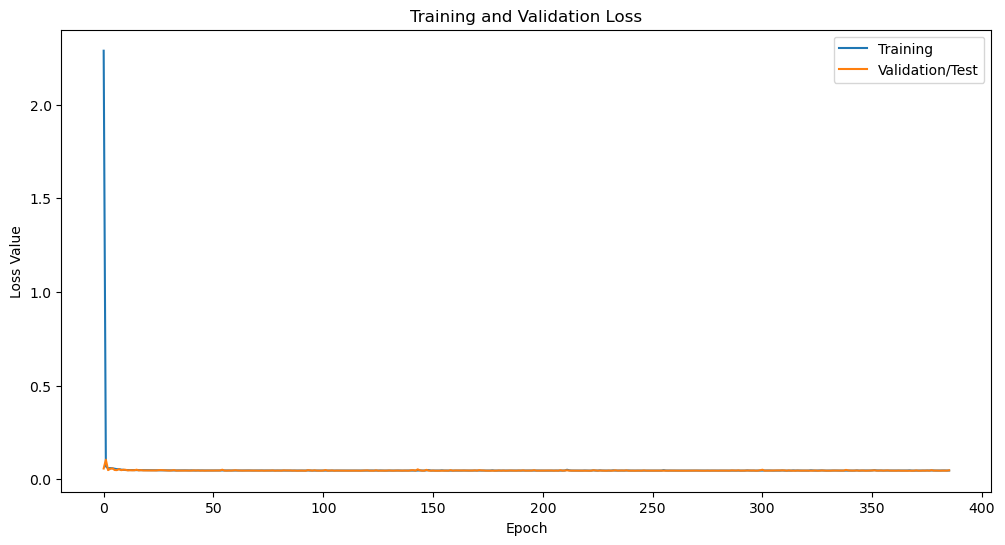

In [ ]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['loss'], label='Training')
plt.plot(history_1.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
pred = model_1.predict(x_test_Ob1)
rmse = np.sqrt(mean_squared_error(y_test['score_G'], pred))
target_range = np.max(y_test['score_G']) - np.min(y_test['score_G'])
percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy

94/94 [==============================] - 0s 2ms/step


78.52370431397668

In [ ]:
def create_model(activation_1, activation_2, activation_3, init_mode_1, init_mode_2, init_mode_3, regularizer_type):

    if regularizer_type == "l1":
        regularizer = keras.regularizers.l1(0.01)
    elif regularizer_type == "l2":
        regularizer = keras.regularizers.l2(0.01)
    else:
        regularizer = None


    model = keras.Sequential([
        keras.layers.Dense(950, input_shape=(7,), activation=activation_1,
                           kernel_initializer=init_mode_1, kernel_regularizer=regularizer_type),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(950, activation=activation_2, kernel_initializer=init_mode_2),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(950, activation=activation_3, kernel_initializer=init_mode_3),
        keras.layers.Dense(1)
    ])
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Función objetivo para Optuna
def objective(trial):

    regularizer_type = trial.suggest_categorical('regularizer_type', [None, "l1", "l2"])

    activations_list = ["elu","exponential","hard_sigmoid","linear", "relu","selu","sigmoid","softmax","softplus",
                                                                                         "softsign","swish","tanh"]
    activation_1 = trial.suggest_categorical('activation_1', activations_list)
    activation_2 = trial.suggest_categorical('activation_2', activations_list)
    activation_3 = trial.suggest_categorical('activation_3', activations_list)

    init_list = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    init_mode_1 = trial.suggest_categorical('init_mode_1', init_list)
    init_mode_2 = trial.suggest_categorical('init_mode_2', init_list)
    init_mode_3 = trial.suggest_categorical('init_mode_3', init_list)

    model = create_model(activation_1, activation_2, activation_3, init_mode_1, init_mode_2, init_mode_3, regularizer_type)
    EarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 25, mode = 'min', restore_best_weights = True)
    history = model.fit(x_train_Ob1, y_train['score_LC'], epochs=100, validation_data=(x_test_Ob1, y_test['score_LC']), verbose=0, callbacks=EarlyStop)

    # Usa la pérdida de validación como métrica para optimizar
    val_loss = history.history['val_loss'][-1]
    return val_loss
start=perf_counter()
# Iniciar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:", study.best_params)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

[I 2024-02-21 19:59:56,123] A new study created in memory with name: no-name-0fba7b8a-bf4c-41ee-95a1-5d657ae42b96
[I 2024-02-21 20:00:57,206] Trial 0 finished with value: 0.09646686911582947 and parameters: {'regularizer_type': 'l2', 'activation_1': 'hard_sigmoid', 'activation_2': 'linear', 'activation_3': 'selu', 'init_mode_1': 'he_uniform', 'init_mode_2': 'he_uniform', 'init_mode_3': 'zero'}. Best is trial 0 with value: 0.09646686911582947.
[I 2024-02-21 20:02:48,612] Trial 1 finished with value: 0.07272999733686447 and parameters: {'regularizer_type': 'l2', 'activation_1': 'softsign', 'activation_2': 'softsign', 'activation_3': 'exponential', 'init_mode_1': 'he_uniform', 'init_mode_2': 'lecun_uniform', 'init_mode_3': 'lecun_uniform'}. Best is trial 1 with value: 0.07272999733686447.
[I 2024-02-21 20:04:21,368] Trial 2 finished with value: 0.10155710577964783 and parameters: {'regularizer_type': 'l1', 'activation_1': 'tanh', 'activation_2': 'elu', 'activation_3': 'softmax', 'init_mod

Mejores hiperparámetros: {'regularizer_type': None, 'activation_1': 'relu', 'activation_2': 'elu', 'activation_3': 'softplus', 'init_mode_1': 'he_uniform', 'init_mode_2': 'normal', 'init_mode_3': 'uniform'}
Elapsed time: 202.70 min.


Mejores hiperparámetros: {'regularizer_type': None, 'activation_1': 'relu', 'activation_2': 'elu', 'activation_3': 'softplus', 'init_mode_1': 'he_uniform', 'init_mode_2': 'normal', 'init_mode_3': 'uniform'}
Elapsed time: 202.70 min.

In [ ]:
import tensorflow as tf
model_2 = keras.Sequential([
    keras.layers.Dense(950, input_shape=(7,), activation='relu',
                       kernel_initializer='he_uniform', kernel_regularizer=None),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(950, activation='elu', kernel_initializer='normal'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(950, activation= 'softplus', kernel_initializer='uniform'),
    keras.layers.Dense(1)
])

model_2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

EarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 250, mode = 'min', restore_best_weights = True)

history_2 = model_2.fit(x_train_Ob1, y_train['score_LC'], epochs = 1000, validation_data=(x_test_Ob1, y_test['score_LC']), callbacks=EarlyStop)

model_2.evaluate(x_test_Ob1, y_test['score_LC'])

Epoch 1/1000
844/844 [==============================] - 3s 3ms/step - loss: 0.6360 - root_mean_squared_error: 0.7975 - val_loss: 0.0788 - val_root_mean_squared_error: 0.2806
Epoch 2/1000
844/844 [==============================] - 2s 2ms/step - loss: 0.0726 - root_mean_squared_error: 0.2695 - val_loss: 0.0774 - val_root_mean_squared_error: 0.2782
Epoch 3/1000
844/844 [==============================] - 2s 2ms/step - loss: 0.0686 - root_mean_squared_error: 0.2619 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2694
Epoch 4/1000
844/844 [==============================] - 2s 2ms/step - loss: 0.0668 - root_mean_squared_error: 0.2585 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2628
Epoch 5/1000
844/844 [==============================] - 2s 2ms/step - loss: 0.0659 - root_mean_squared_error: 0.2567 - val_loss: 0.0690 - val_root_mean_squared_error: 0.2626
Epoch 6/1000
844/844 [==============================] - 2s 2ms/step - loss: 0.0654 - root_mean_squared_error: 0.2556 - val_loss: 0

[0.06586353480815887, 0.25663891434669495]

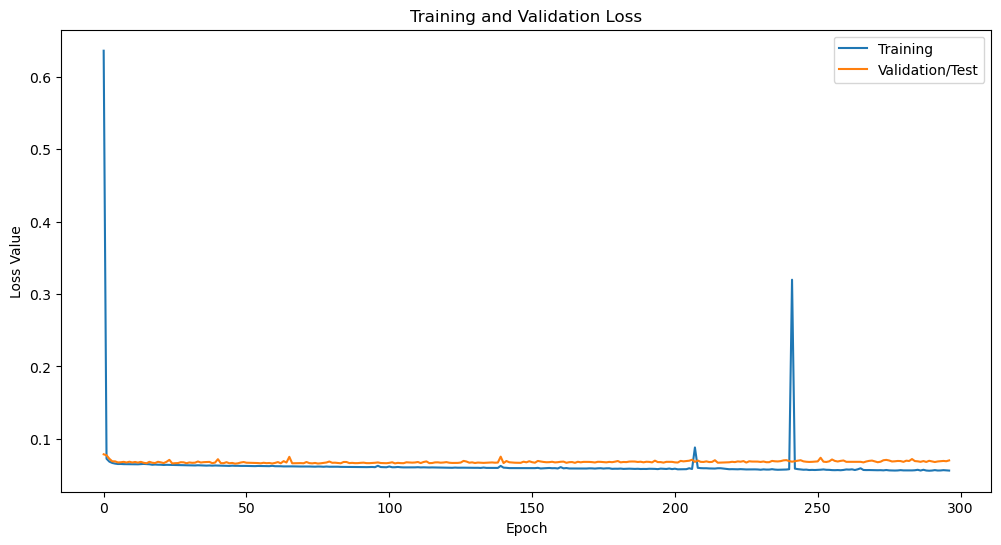

In [ ]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_2.history['loss'], label='Training')
plt.plot(history_2.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [ ]:
pred = model_1.predict(x_test_Ob1)
rmse = np.sqrt(mean_squared_error(y_test['score_LC'], pred))
target_range = np.max(y_test['score_LC']) - np.min(y_test['score_LC'])
percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy

94/94 [==============================] - 0s 2ms/step


64.23539755538772

#### Autoencoder

Epoch 1/1000
844/844 [==============================] - 4s 4ms/step - loss: 0.0222 - root_mean_squared_error: 0.1489 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 2/1000
844/844 [==============================] - 3s 4ms/step - loss: 0.0154 - root_mean_squared_error: 0.1242 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1240
Epoch 3/1000
844/844 [==============================] - 3s 4ms/step - loss: 0.0145 - root_mean_squared_error: 0.1204 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 4/1000
844/844 [==============================] - 3s 4ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1153
Epoch 5/1000
844/844 [==============================] - 3s 4ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 6/1000
844/844 [==============================] - 3s 4ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0

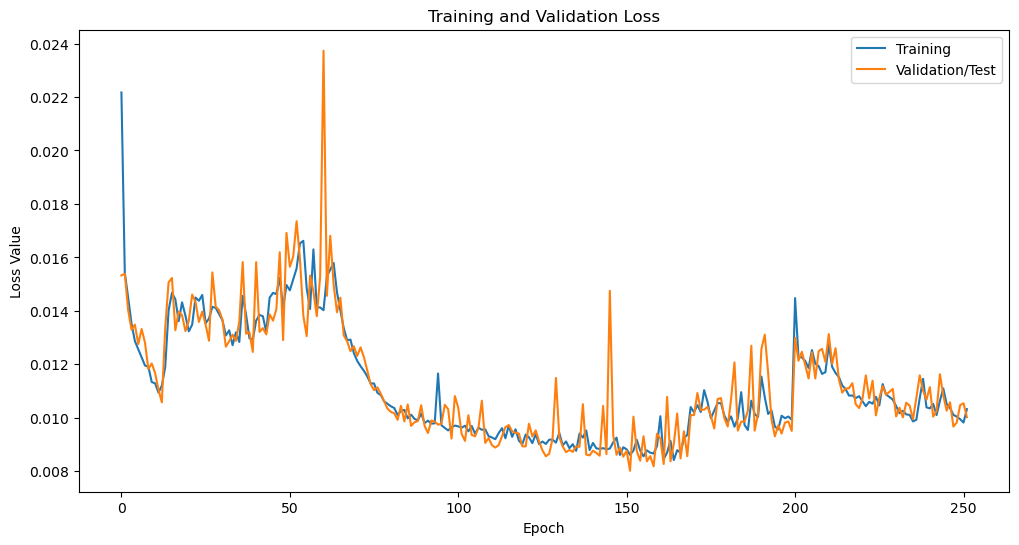

In [ ]:
# Definir el encoder
input_enc = keras.layers.Input(shape=(7,))
enc = keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal')(input_enc)
enc = keras.Sequential([
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='sigmoid', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(enc)
encoder_base = keras.models.Model(input_enc, enc)

# Definir el decoder
input_dec = keras.layers.Input(shape=(3,))
dec = keras.Sequential([
    keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='sigmoid', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(7)
])(input_dec)
decoder_base = keras.models.Model(input_dec, dec)

# Construir el autoencoder
autoencoder_input = keras.layers.Input(shape=(7,))
encoded_repr = encoder_base(autoencoder_input)
reconstructed = decoder_base(encoded_repr)
autoencoder_base = keras.models.Model(autoencoder_input, reconstructed)

# Compilar el autoencoder
autoencoder_base.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

# Entrenamiento del autoencoder
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
start = perf_counter()
history_base = autoencoder_base.fit(x_train_Ob1, x_train_Ob1, epochs=1000, validation_data=(x_test_Ob1, x_test_Ob1), callbacks=[callback])
tl = (perf_counter() - start) / 60
print('Elapsed time: %.2f min.' % tl)

# Evaluar el autoencoder
autoencoder_base.evaluate(x_test_Ob1, x_test_Ob1)

# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_base.history['loss'], label='Training')
plt.plot(history_base.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [ ]:
pred = autoencoder_base.predict(x_test_Ob1)
rmse = np.sqrt(mean_squared_error(x_test_Ob1, pred))
target_range = np.max(x_test_Ob1) - np.min(x_test_Ob1)
percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy

94/94 [==============================] - 0s 1ms/step


91.04320458912278

### Objetivo 2

#### Dataset de la clase negativa y neutra

In [ ]:
df

,adapt,prevent_exp,prevent_reason,follow_norms,leaving_home,people,rooms,amenit,respons,prevent_outcome,...,income,gender,age,covid_self,stay_home,from_channel,score_G,score_LC,score_resili,label
0,2.000000,2.000,1.50,3.0,1.0,2.0,3.0,0.50,0.333333,2.625,...,1.0,2.0,38.0,2.0,1.0,2.0,0.933333,0.111111,1.044444,2
1,0.000000,0.875,1.00,1.0,-1.0,7.0,1.0,0.25,0.333333,2.000,...,2.0,3.0,28.0,3.0,2.0,3.0,1.000000,1.000000,2.000000,2
2,2.666667,2.625,3.00,3.0,1.5,2.0,3.0,0.75,0.666667,3.000,...,1.0,1.0,42.0,0.0,0.0,2.0,0.733333,0.000000,0.733333,2
3,2.333333,2.375,2.25,3.0,2.0,3.0,3.0,0.25,0.333333,2.250,...,1.0,1.0,43.0,0.0,0.0,2.0,0.600000,0.555556,1.155556,2
4,1.333333,2.500,3.00,3.0,1.0,1.0,2.0,0.25,0.333333,3.000,...,1.0,1.0,39.0,0.0,1.0,10.0,0.800000,0.388889,1.188889,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82771,1.666667,1.125,1.00,3.0,0.5,4.0,4.0,1.00,0.333333,1.625,...,1.0,2.0,53.0,1.0,0.0,5.0,0.133333,-0.055556,0.077778,1
82772,1.333333,2.250,1.00,3.0,-0.5,2.0,6.0,0.75,0.333333,2.500,...,1.0,2.0,38.0,2.0,1.0,2.0,0.133333,-0.111111,0.022222,1
82773,2.333333,2.125,1.75,3.0,2.0,0.0,3.0,0.25,0.333333,2.125,...,1.0,2.0,36.0,1.0,1.0,5.0,0.600000,0.444444,1.044444,2
82774,-1.333333,0.000,0.00,0.0,-1.0,0.0,0.0,0.25,0.333333,0.000,...,1.0,2.0,21.0,1.0,-2.0,3.0,0.000000,-0.500000,-0.500000,0


In [41]:
# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [0,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data_1 = df.loc[selected_indices]
# Mostrar el nuevo DataFrame
selected_data_1 = selected_data_1.replace({2:1})
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(selected_data_1.drop(['label','score_resili','score_G','score_LC'],axis=1),selected_data_1['label'],test_size=0.3,random_state=42)
x_train_1.shape,x_test_1.shape

x_train_1_norm = pd.DataFrame(transform.fit_transform(x_train_1))
x_test_1_norm = pd.DataFrame(transform.fit_transform(x_test_1))
x_train_1_norm.columns, x_test_1_norm.columns = x_train.columns, x_test.columns
x_train_1_norm.shape, x_test_1_norm.shape

((14000, 38), (6000, 38))

#### Dataset de la clase positiva y la neutra

In [ ]:
# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [1,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data_2 = df.loc[selected_indices]
# Mostrar el nuevo DataFrame
selected_data_2

selected_data_2 = selected_data_2.replace({1:0,2:1})
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(selected_data_2.drop(['label', 'score_resili','score_G','score_LC'],axis=1),selected_data_2['label'],test_size=0.3,random_state=42)
x_train_2.shape,x_test_2.shape

x_train_2_norm = pd.DataFrame(transform.fit_transform(x_train_2))
x_test_2_norm = pd.DataFrame(transform.fit_transform(x_test_2))
x_train_2_norm.columns, x_test_2_norm.columns = x_train.columns, x_test.columns
x_train_2_norm.shape, x_test_2_norm.shape

((14000, 38), (6000, 38))

In [ ]:
y_train_1.value_counts(), y_train_2.value_counts()

(label
 1    7017
 0    6983
 Name: count, dtype: int64,
 label
 1    7017
 0    6983
 Name: count, dtype: int64)

### Feature selection con DT

##### Primer modelo, clase negativa con clase ambigua

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_1.fit(x_train_1_norm, y_train_1)

dot = export_graphviz(
    tree_1,
    out_file=None,
    feature_names=x_test_1_norm.columns,
    class_names=['0','1'],
    filled=True,
    rounded=True,
    special_characters=True
)

import graphviz
graph = graphviz.Source(dot)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

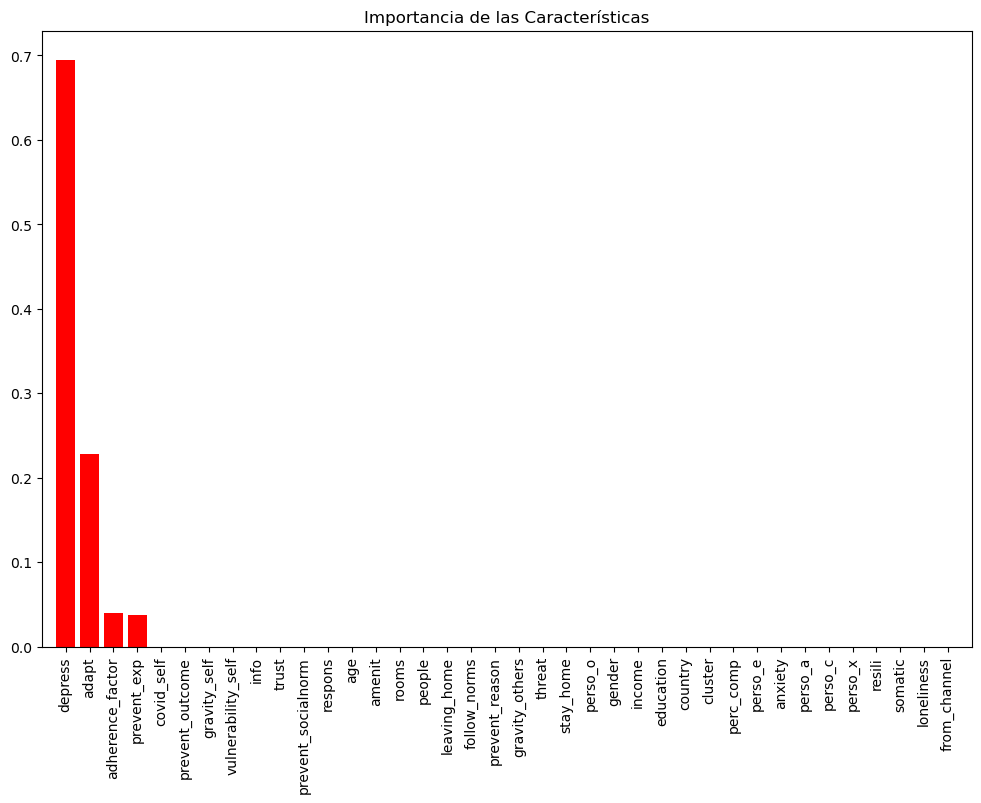

In [ ]:
feature_importances = tree_1.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Importancia de las Características")
plt.bar(range(x_train_1_norm.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(x_train_1_norm.shape[1]), x_train_1_norm.columns[indices], rotation=90)
plt.xlim([-1, x_train_1_norm.shape[1]])
plt.show()

##### Segundo modelo, clase positiva con clase ambigua

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_2.fit(x_train_2_norm, y_train_2)

dot = export_graphviz(
    tree_2,
    out_file=None,
    feature_names=x_test_2_norm.columns,
    class_names=['1','2'],
    filled=True,
    rounded=True,
    special_characters=True
)

import graphviz
graph = graphviz.Source(dot)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

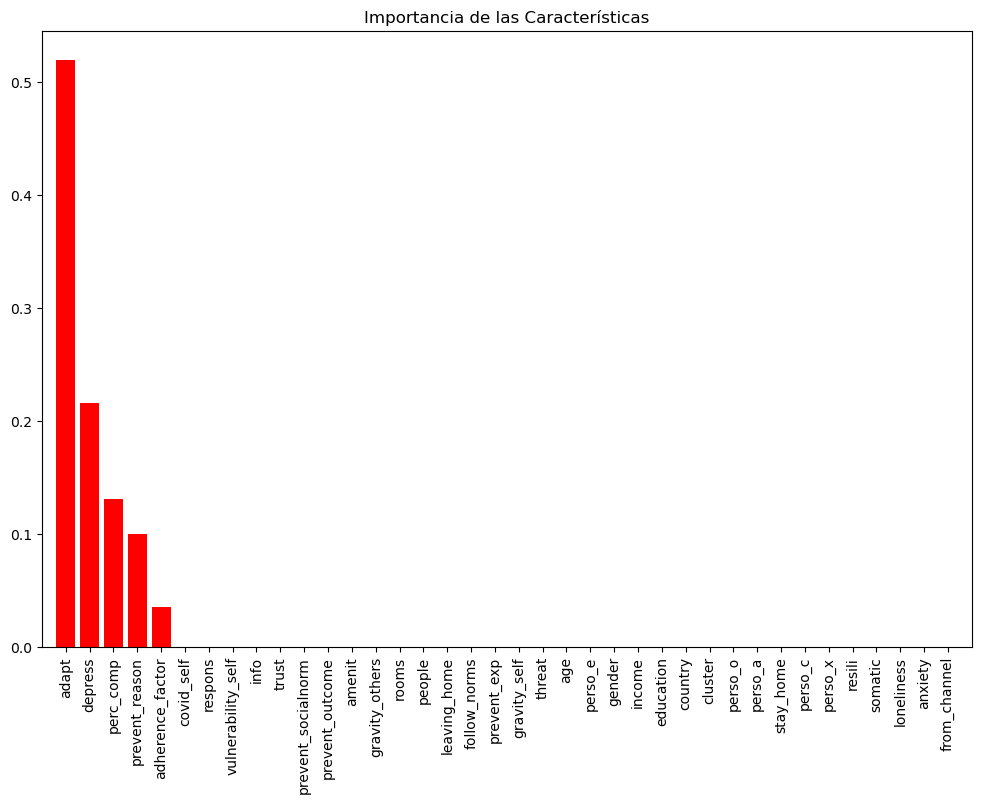

In [ ]:
feature_importances = tree_2.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Importancia de las Características")
plt.bar(range(x_train_2_norm.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(x_train_2_norm.shape[1]), x_train_2_norm.columns[indices], rotation=90)
plt.xlim([-1, x_train_2_norm.shape[1]])
plt.show()

### Prueba de hipotesis y nivel de significancia de las features

#### Modelo 1 con todas las features

In [55]:
y_test_1.reset_index(drop=True, inplace=True)
# y_test_2.reset_index(drop=True, inplace=True)

In [46]:
x_train_1

,adapt,prevent_exp,prevent_reason,follow_norms,leaving_home,people,rooms,amenit,respons,prevent_outcome,...,perc_comp,cluster,country,education,income,gender,age,covid_self,stay_home,from_channel
24208,1.333333,2.125,2.25,2.0,1.0,1.0,4.0,1.00,0.333333,1.750,...,3.0,0.0,147.0,3.0,1.0,2.0,30.0,0.0,0.0,2.0
71013,1.333333,1.250,1.50,3.0,-0.5,6.0,4.0,1.00,0.000000,2.500,...,5.0,0.0,221.0,3.0,2.0,2.0,22.0,1.0,1.0,10.0
3689,1.666667,2.250,1.50,3.0,2.0,4.0,4.0,0.25,0.333333,2.500,...,4.0,0.0,147.0,3.0,1.0,2.0,49.0,1.0,2.0,2.0
9318,2.666667,1.375,2.00,3.0,-0.5,3.0,4.0,0.50,0.333333,2.875,...,4.0,0.4,147.0,3.0,1.0,2.0,44.0,0.0,2.0,2.0
60305,1.666667,2.875,3.00,3.0,-0.5,3.0,3.0,0.25,0.333333,3.000,...,5.0,0.0,161.0,3.0,1.0,2.0,42.0,1.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77101,1.333333,1.500,3.00,3.0,0.5,9.0,6.0,0.25,0.333333,1.750,...,3.0,0.2,245.0,3.0,2.0,1.0,41.0,0.0,1.0,10.0
25676,2.333333,2.000,2.00,3.0,0.5,3.0,4.0,1.00,0.333333,2.625,...,5.0,0.0,275.0,3.0,2.0,2.0,46.0,0.0,0.0,10.0
45784,-1.000000,3.000,2.00,3.0,1.0,3.0,6.0,0.25,0.333333,3.000,...,5.0,0.2,131.0,3.0,1.0,1.0,42.0,0.0,2.0,10.0
71045,-1.333333,0.375,3.00,1.0,2.0,3.0,1.0,0.25,0.333333,2.000,...,2.0,0.2,221.0,3.0,0.0,2.0,35.0,0.0,-2.0,10.0


In [80]:
# x_train_1_norm.reset_index(drop=True, inplace=True)
y_train_1.reset_index(drop=True, inplace=True)

In [81]:
import statsmodels.api as sm

sm_model_1 = sm.Logit(y_train_1,sm.add_constant(x_train_1_norm))
result_1=sm_model_1.fit()
stats=result_1.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.461697
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13961
Method:                           MLE   Df Model:                           38
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.3339
Time:                        21:51:17   Log-Likelihood:                -6463.8
converged:                       True   LL-Null:                       -9704.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3254      0.195    -22.186      0.000      -4.708      -3.943
adapt

In [50]:
print(tf.__version__)

2.10.0


In [59]:
x_train_1_norm.reset_index(drop=True, inplace=True)
y_train_1.reset_index(drop=True, inplace=True)
x_test_1_norm.reset_index(drop=True, inplace=True)
y_test_1.reset_index(drop=True, inplace=True)

In [64]:
x_train_1p = pd.DataFrame(x_train_1_norm[['adapt','depress','adherence_factor','prevent_outcome']])
x_test_1p = pd.DataFrame(x_test_1_norm[['adapt','depress','adherence_factor','prevent_outcome']])

In [66]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    keras.layers.Dense(950, input_shape=(4,), activation='swish'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(950, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.metrics.BinaryAccuracy()]
)
CB = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, mode='min', restore_best_weights=True)
model.fit(x_train_1p, y_train_1, validation_data=(x_test_1p, y_test_1), epochs=1000, callbacks=CB)
model.evaluate(x_test_1p, y_test_1)

Epoch 1/1000
438/438 [==============================] - 2s 4ms/step - loss: 0.5354 - binary_accuracy: 0.7326 - val_loss: 0.5464 - val_binary_accuracy: 0.7187
Epoch 2/1000
438/438 [==============================] - 1s 3ms/step - loss: 0.5225 - binary_accuracy: 0.7461 - val_loss: 0.5243 - val_binary_accuracy: 0.7372
Epoch 3/1000
438/438 [==============================] - 1s 3ms/step - loss: 0.5204 - binary_accuracy: 0.7446 - val_loss: 0.5210 - val_binary_accuracy: 0.7385
Epoch 4/1000
438/438 [==============================] - 1s 3ms/step - loss: 0.5198 - binary_accuracy: 0.7427 - val_loss: 0.5175 - val_binary_accuracy: 0.7415
Epoch 5/1000
438/438 [==============================] - 1s 3ms/step - loss: 0.5175 - binary_accuracy: 0.7444 - val_loss: 0.5168 - val_binary_accuracy: 0.7500
Epoch 6/1000
438/438 [==============================] - 1s 3ms/step - loss: 0.5182 - binary_accuracy: 0.7466 - val_loss: 0.5125 - val_binary_accuracy: 0.7457
Epoch 7/1000
438/438 [==============================

[0.5099229216575623, 0.7511666417121887]

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test_1p)
y_pred = (y_pred >= 0.5).astype(int)
print(classification_report(y_test_1, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test_1, y_pred))

188/188 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      3017
           1       0.72      0.82      0.77      2983

    accuracy                           0.75      6000
   macro avg       0.76      0.75      0.75      6000
weighted avg       0.76      0.75      0.75      6000

Matriz de confusión:
[[2049  968]
 [ 525 2458]]


Accuracy: 0.7511666666666666
Confusion Matrix:
[[2049  968]
 [ 525 2458]]
AUC Score: 0.751577078419518
F1 Score: 0.7670463410828522


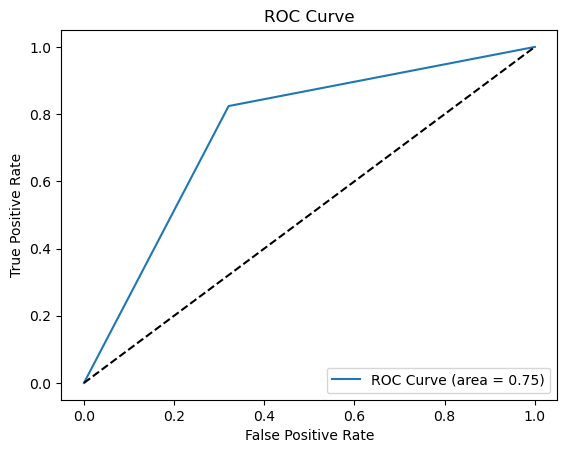

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve

# Calcular la precisión
accuracy = accuracy_score(y_test_1, y_pred)
print(f"Accuracy: {accuracy}")

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_1, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Calcular la puntuación AUC
# Para AUC necesitamos las probabilidades, no las clases predichas
auc_score = roc_auc_score(y_test_1, y_pred)
print(f"AUC Score: {auc_score}")

# Calcular la puntuación F1
f1 = f1_score(y_test_1, y_pred)
print(f"F1 Score: {f1}")

# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
sm_model_2 = sm.Logit(y_train_2,sm.add_constant(x_train_2))
result_2=sm_model_2.fit()
stats=result_2.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.619340
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13961
Method:                           MLE   Df Model:                           38
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                  0.1065
Time:                        17:32:47   Log-Likelihood:                -8670.8
converged:                       True   LL-Null:                       -9704.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6530      0.159    -10.384      0.000      -1.965      -1.341
adapt

#### Modelo 1 con feature selection

In [60]:
x_train_1p = pd.DataFrame(x_train_1_norm[['adapt','depress','adherence_factor','prevent_outcome']])
x_test_1p = pd.DataFrame(x_test_1_norm[['adapt','depress','adherence_factor','prevent_outcome']])

In [61]:
sm_model_1p = sm.Logit(y_train_1,sm.add_constant(x_train_1p))
result_1p=sm_model_1p.fit()
stats=result_1p.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.516920
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13995
Method:                           MLE   Df Model:                            4
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.2542
Time:                        21:21:29   Log-Likelihood:                -7236.9
converged:                       True   LL-Null:                       -9704.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.1559      0.115    -27.408      0.000      -3.382      -2.930
adapt      

#### Modelo 2 con feature selection

In [ ]:
x_train_2p = pd.DataFrame(x_train_2[['adapt','perc_comp','depress','prevent_reason','anxiety']])
x_test_2p = pd.DataFrame(x_test_2[['adapt','perc_comp','depress','prevent_reason','anxiety']])

In [ ]:
sm_model_2p = sm.Logit(y_train_2,sm.add_constant(x_train_2p))
result_2p=sm_model_2p.fit()
stats=result_2p.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.639443
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13994
Method:                           MLE   Df Model:                            5
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                 0.07747
Time:                        17:32:57   Log-Likelihood:                -8952.2
converged:                       True   LL-Null:                       -9704.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7157      0.090    -18.987      0.000      -1.893      -1.539
adapt            

### Estudio de la separabilidad de los modelos por cluster basado en la media del valor de las respuestas de las herramientas seleccionadas

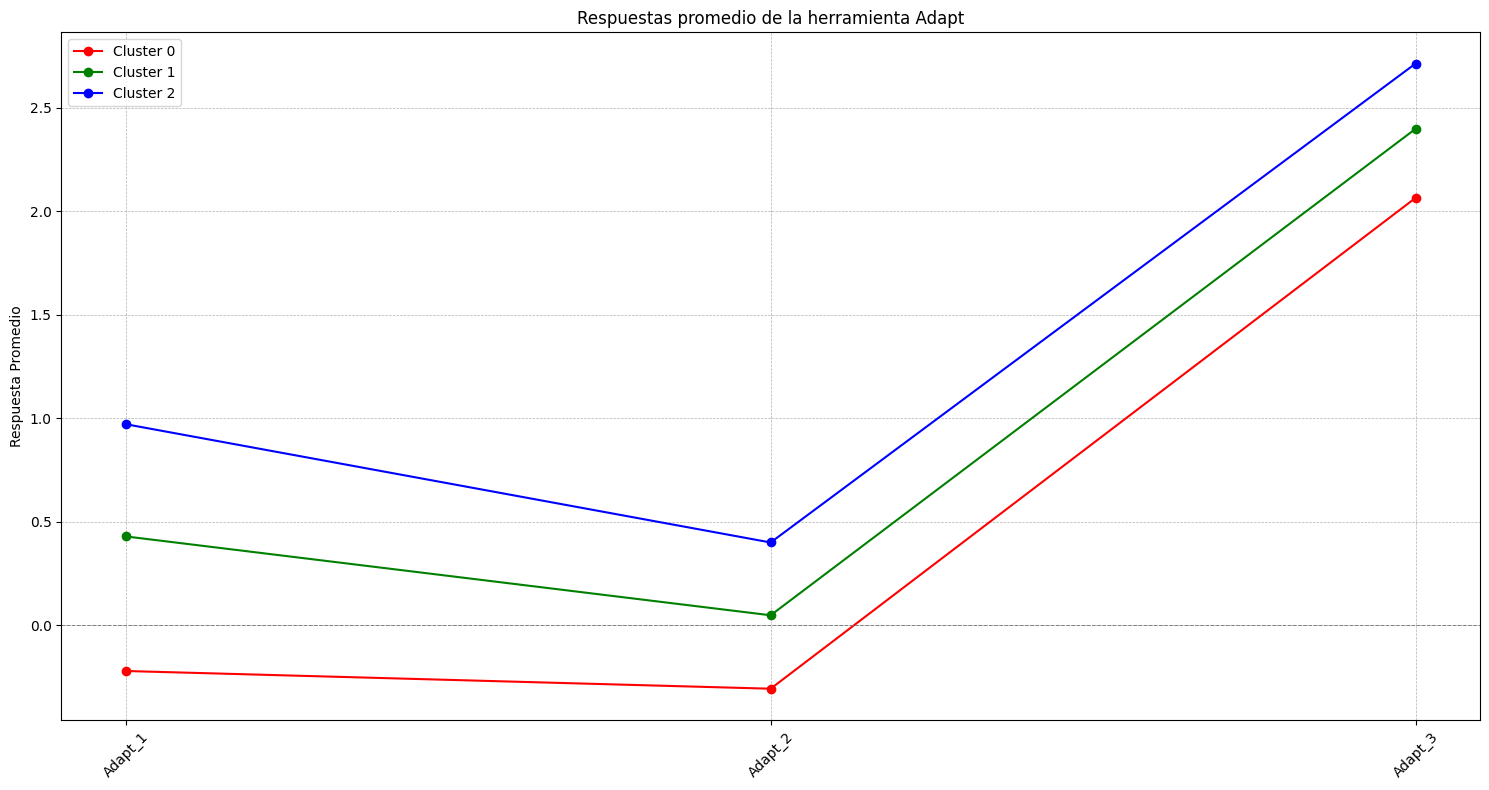

,Adapt_1,Adapt_2,Adapt_3
label,,,
0,-0.221539,-0.307183,2.064351
1,0.428703,0.047680,2.398115
2,0.970986,0.399450,2.713467


In [ ]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_raw.groupby('label')[['Adapt_1', 'Adapt_2', 'Adapt_3',]].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Adapt')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

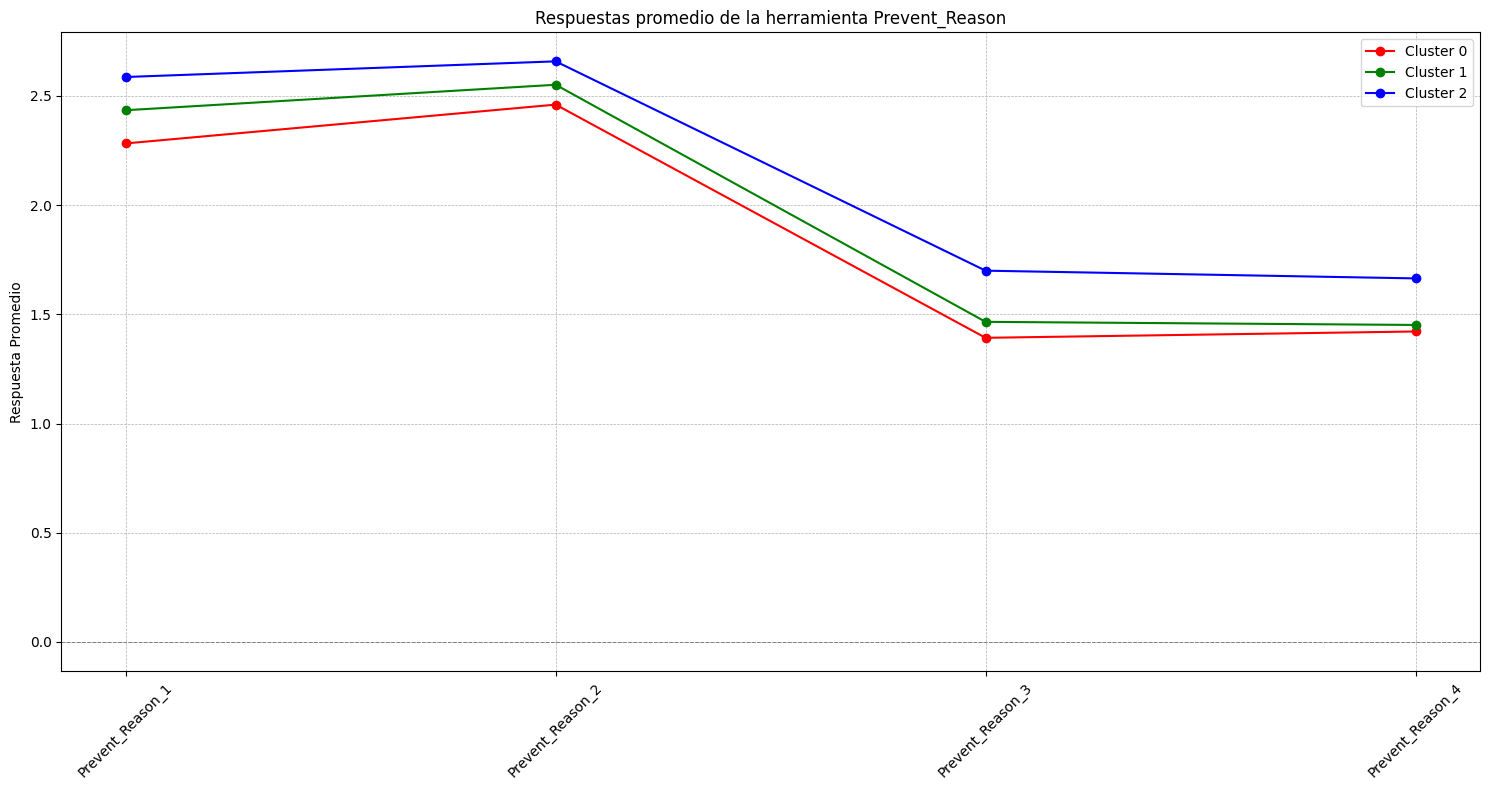

,Prevent_Reason_1,Prevent_Reason_2,Prevent_Reason_3,Prevent_Reason_4
label,,,,
0,2.282389,2.460112,1.392354,1.421312
1,2.434410,2.551024,1.465474,1.451235
2,2.586523,2.658136,1.699777,1.664385


In [ ]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_raw.groupby('label')[['Prevent_Reason_1', 'Prevent_Reason_2', 'Prevent_Reason_3', 'Prevent_Reason_4']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Prevent_Reason')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

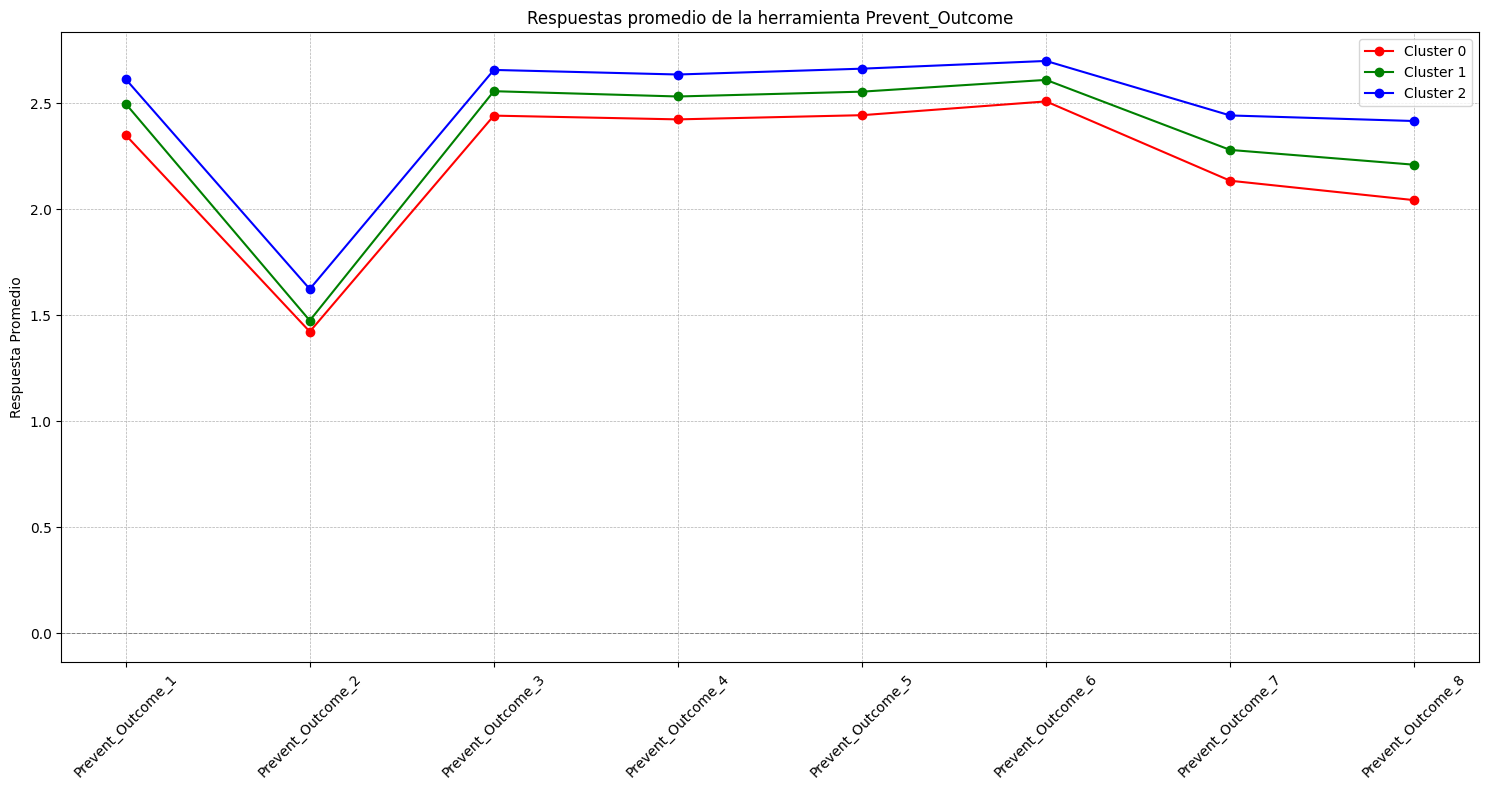

,Prevent_Outcome_1,Prevent_Outcome_2,Prevent_Outcome_3,Prevent_Outcome_4,Prevent_Outcome_5,Prevent_Outcome_6,Prevent_Outcome_7,Prevent_Outcome_8
label,,,,,,,,
0,2.350052,1.422826,2.441753,2.424056,2.443835,2.508848,2.134665,2.043059
1,2.497845,1.475135,2.556999,2.532029,2.554829,2.610297,2.279986,2.210190
2,2.613981,1.623755,2.657307,2.635734,2.663218,2.699647,2.442595,2.416278


In [ ]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_raw.groupby('label')[['Prevent_Outcome_1', 'Prevent_Outcome_2', 'Prevent_Outcome_3', 'Prevent_Outcome_4',
                                         'Prevent_Outcome_5', 'Prevent_Outcome_6', 'Prevent_Outcome_7', 'Prevent_Outcome_8',]].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Prevent_Outcome')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

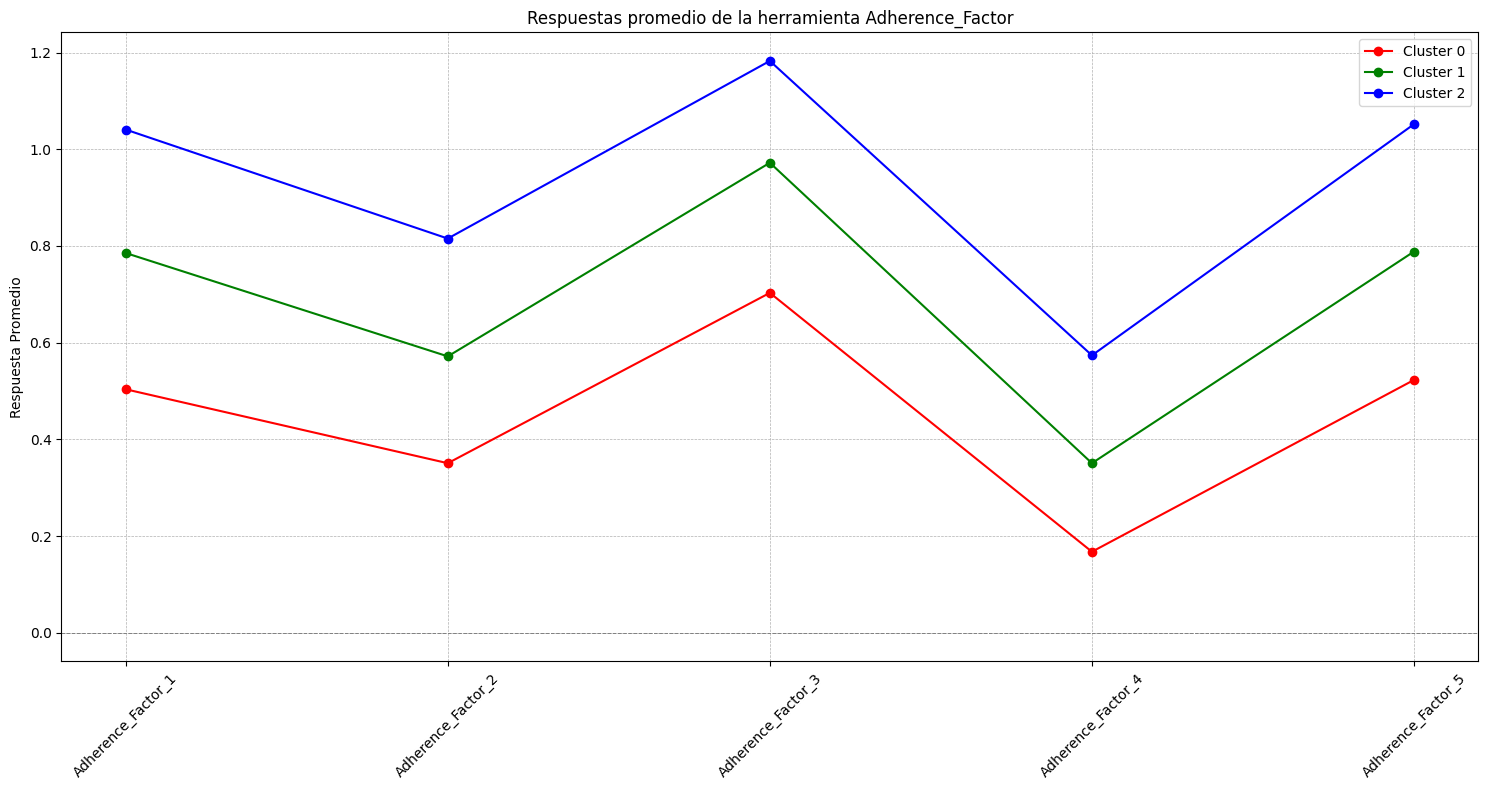

,Adherence_Factor_1,Adherence_Factor_2,Adherence_Factor_3,Adherence_Factor_4,Adherence_Factor_5
label,,,,,
0,0.503643,0.350714,0.703038,0.167597,0.522949
1,0.785440,0.571683,0.972117,0.350703,0.788502
2,1.040759,0.815339,1.182716,0.573714,1.051908


In [ ]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_raw.groupby('label')[['Adherence_Factor_1', 'Adherence_Factor_2', 'Adherence_Factor_3', 'Adherence_Factor_4',
                                         'Adherence_Factor_5']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Adherence_Factor')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

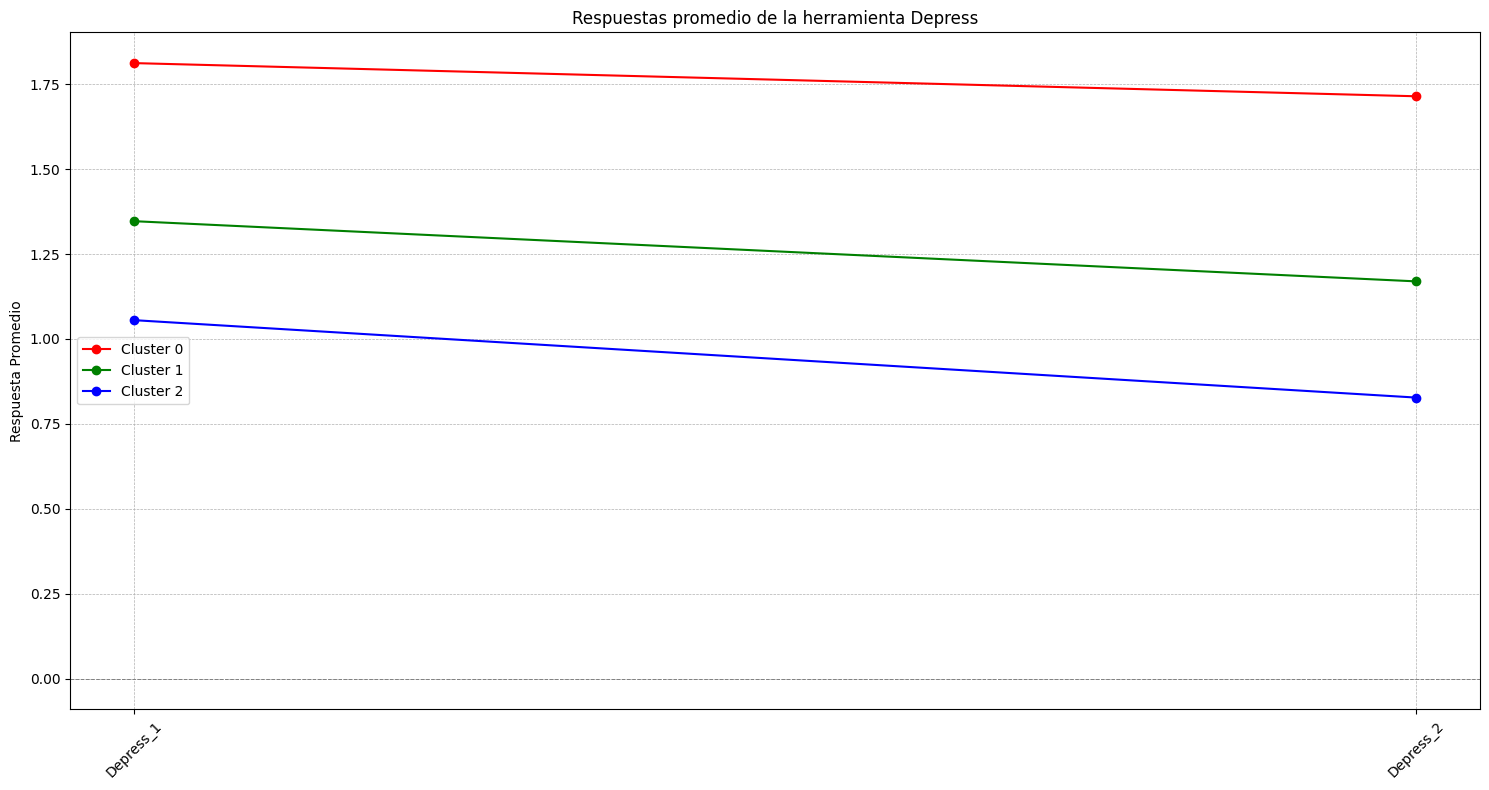

,Depress_1,Depress_2
label,,
0,1.812435,1.714772
1,1.346868,1.169644
2,1.055383,0.827422


In [ ]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_raw.groupby('label')[['Depress_1', 'Depress_2',]].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Depress')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

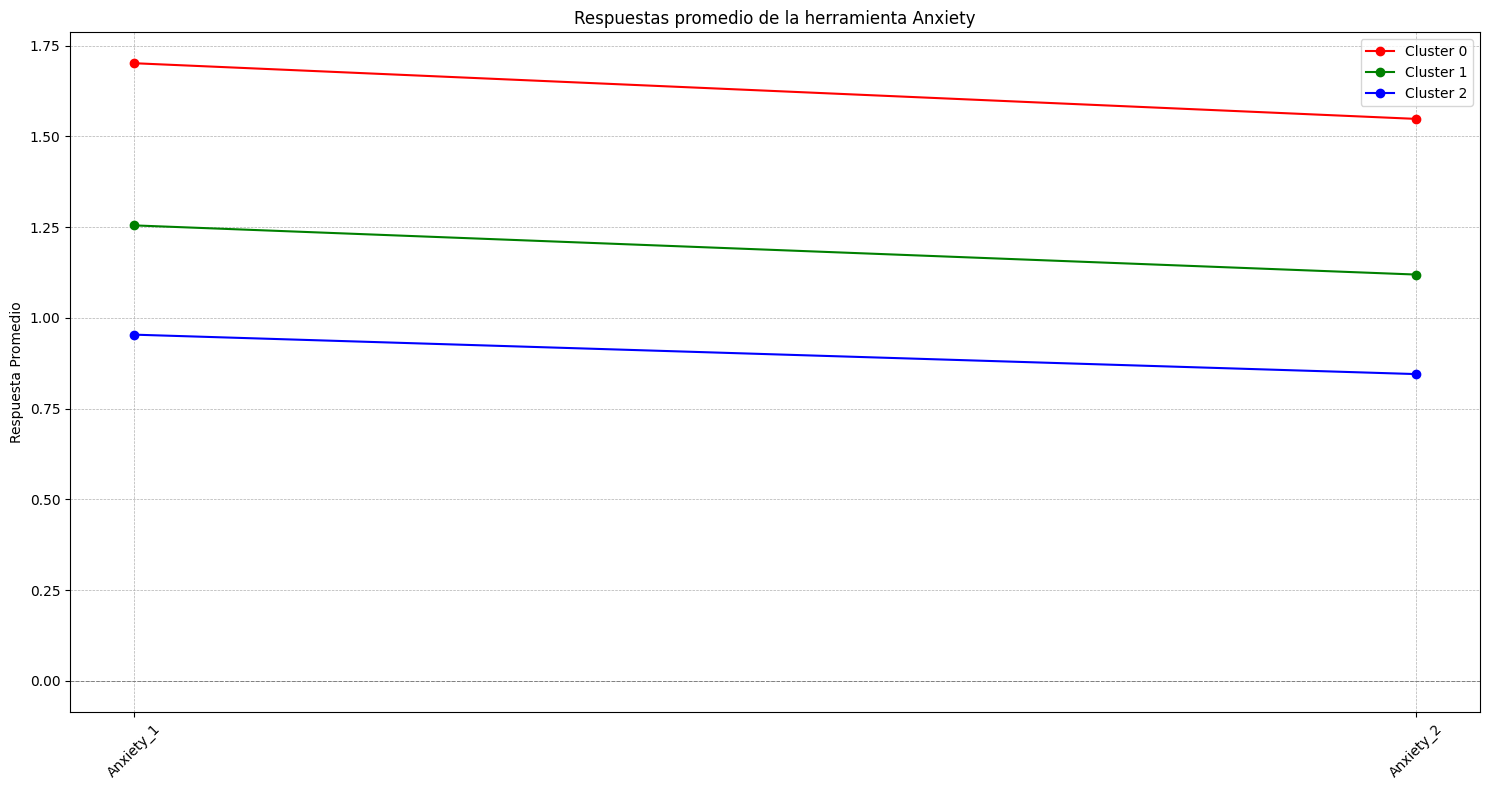

,Anxiety_1,Anxiety_2
label,,
0,1.701429,1.548122
1,1.254778,1.119348
2,0.953822,0.845208


In [ ]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_raw.groupby('label')[['Anxiety_1', 'Anxiety_2',]].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Anxiety')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

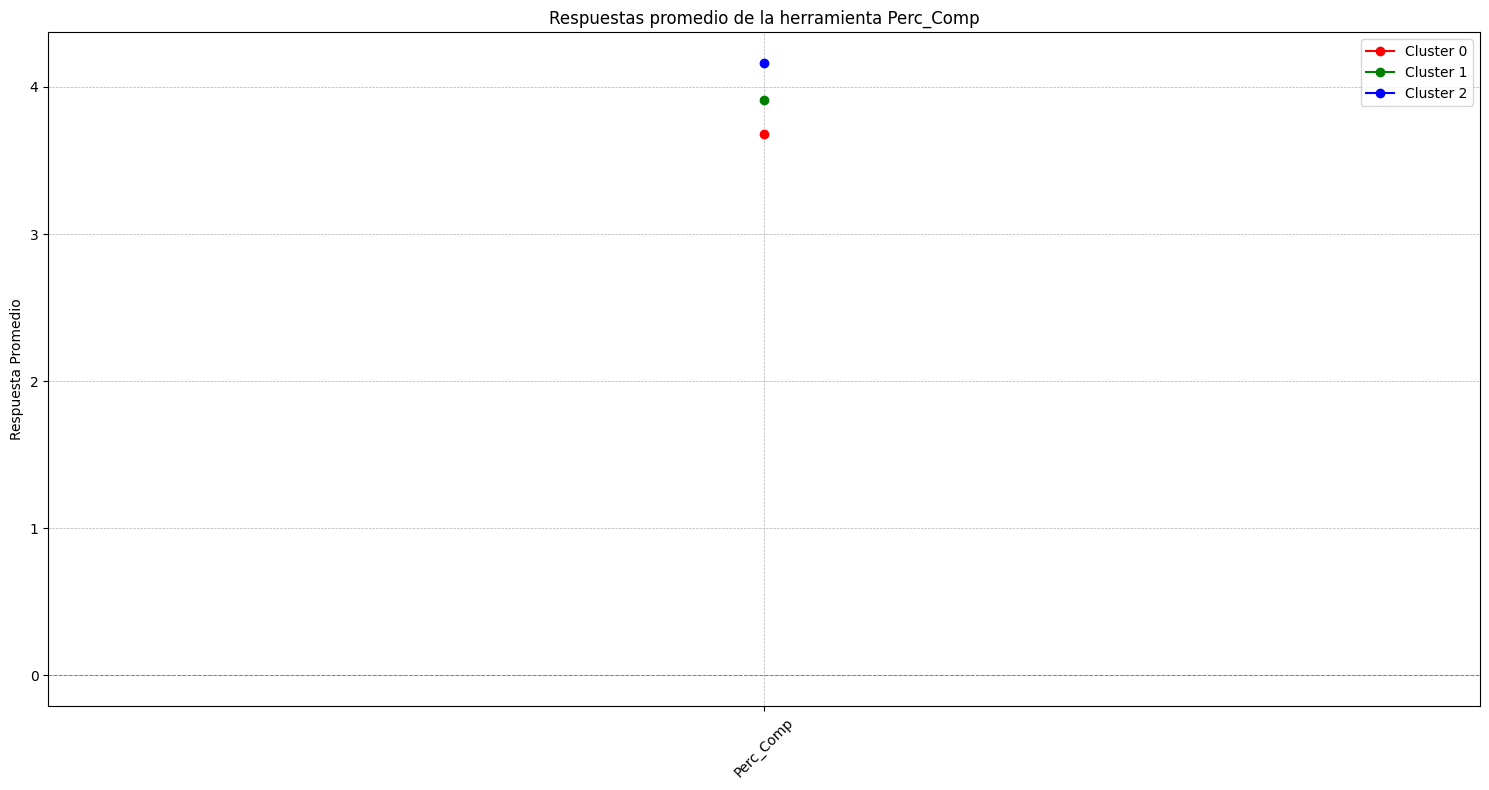

,Perc_Comp
label,
0,3.679758
1,3.908505
2,4.163244


In [ ]:
# ETIQUETADO BASE
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df_raw.groupby('label')[['Perc_Comp',]].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Perc_Comp')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

In [ ]:
['adapt','depress','anxiety', 'adherence_factor']

en que punto las funciones de supoervivencia y acumulativa de ambas distribuciones se encuentra el minimo valor
izquierda ACDF
Derecha CCAF o supervivencia



### Analisis de componentes principales

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['label'],axis=1))

pca = PCA(0.90)
pca.fit(df_scaled)
X_pca = pca.transform(selected_data.drop(['label'],axis=1))

C:\Users\sweet\anaconda3\envs\DL\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Varianza explicada por cada componente: [0.12384925 0.08772373 0.05635842 0.0453517  0.04074779 0.03852007
 0.03463126 0.0336469  0.03182151 0.02806278 0.0257121  0.02436625
 0.02399766 0.02302581 0.02149243 0.02131982 0.02041296 0.0198414
 0.0193064  0.01848418 0.01828283 0.01722934 0.01710345 0.01693314
 0.01576353 0.01502198 0.01440684 0.01418231 0.01378459 0.01341024
 0.01323925]
Varianza acumulada: [0.12384925 0.21157298 0.2679314  0.31328309 0.35403088 0.39255095
 0.42718221 0.46082911 0.49265063 0.5207134  0.5464255  0.57079175
 0.59478941 0.61781522 0.63930765 0.66062747 0.68104043 0.70088183
 0.72018824 0.73867242 0.75695525 0.77418459 0.79128804 0.80822117
 0.82398471 0.83900669 0.85341352 0.86759584 0.88138043 0.89479067
 0.90802991]
Cantidad de datos que representan el 90% de la informacion: 31


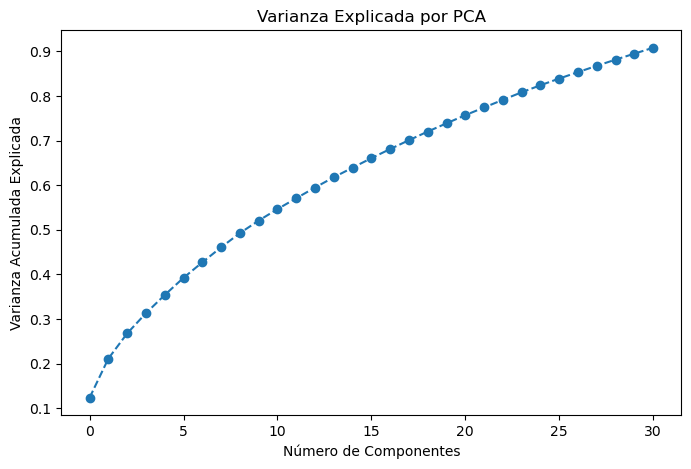

In [ ]:
# Varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print("Varianza acumulada:", varianza_acumulada)

# Imprime la cantidad de datos necesaria para representar el 90% de la informacion
print("Cantidad de datos que representan el 90% de la informacion:", len(varianza_acumulada))

# Graficar la varianza explicada acumulada para visualizar cuántos componentes son necesarios
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Explicada por PCA')
plt.show()

In [ ]:
# Dividir los datos en entrenamiento y prueba
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, selected_data['label'], test_size=0.3, random_state=42)
x_train

In [ ]:
selected_indices = []
for label in [0,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data_3 = df.loc[selected_indices]
# Mostrar el nuevo DataFrame
selected_data_3

selected_data_3 = selected_data_3.replace({2:1})
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(selected_data_3.drop(['label','score_resili'],axis=1),selected_data_3['label'],test_size=0.3,random_state=42)
x_train_3.shape,x_test_3.shape

x_train_3_norm = pd.DataFrame(transform.fit_transform(x_train_3))
x_test_3_norm = pd.DataFrame(transform.fit_transform(x_test_3))
x_train_3_norm.columns, x_test_3_norm.columns = x_train.columns, x_test.columns
x_train_3_norm.shape, x_test_3_norm.shape

x_train_3p = pd.DataFrame(x_train_3[['adapt','perc_comp','depress','prevent_reason','anxiety', 'adherence_factor','prevent_outcome']])
x_test_3p = pd.DataFrame(x_test_3[['adapt','perc_comp','depress','prevent_reason','anxiety', 'adherence_factor','prevent_outcome']])

In [ ]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=10,min_samples_leaf=1)
model_dt.fit(x_train_3p, y_train_3)

preds = model_dt.predict(x_test_3p)
class_report=classification_report(y_test_3, preds)
print(class_report)

### Entrenamiento de modelos

#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# model_svm = SVC()

# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularización
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
#     'gamma': ['scale', 'auto'],  # Coeficiente de kernel para 'rbf', 'poly' y 'sigmoid'
#     'degree': [2, 3, 4],  # Grado del polinomio para 'poly'
#     'decision_function_shape': ['ovo', 'ovr'],  # Estrategia multiclase
# }

# grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# # grid_search.fit(x_train_2, y_train)
# # print('Mejores parámetros:', grid_search.best_params_)


In [ ]:
model_svm = SVC(C=0.1,kernel='sigmoid',gamma='auto',decision_function_shape='ovr')
model_svm.fit(x_train_pca, y_train_pca)

In [ ]:
from sklearn.metrics import classification_report

preds = model_svm.predict(x_test_pca)
class_report=classification_report(y_test_pca, preds)
print(class_report)

#### DT

In [ ]:
from sklearn.model_selection import GridSearchCV
model_dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],  # Función para medir la calidad de una división
    'max_depth': [None, 10, 20, 30, 40, 50],  # Máxima profundidad del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
}
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train_3p, y_train_3)

# Ver los mejores parámetros encontrados
print('Mejores parámetros:', grid_search.best_params_)

In [ ]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=10,min_samples_leaf=4)
model_dt.fit(x_train_1p, y_train_1)

preds = model_dt.predict(x_test_1p)
class_report=classification_report(y_test_1, preds)
print(class_report)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
gnb = GaussianNB()
y_pred = gnb.fit(x_train_1p, y_train_1).predict(x_test_1p)

class_report=classification_report(y_test_1, y_pred)

In [ ]:
print(class_report)